In [71]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import sys
sys.path.append('D:\\Compute Science\\Machine Learning\\论文\\项目\\FairSPL\\venv_torch')
sys.path.append('D:\\Compute Science\\Machine Learning\\论文\\项目\\FairSPL\\venv_torch\\lib\\site-packages')

In [64]:
import json

import numpy as np
import matplotlib.pyplot as plt
import torch

from dataset import fetch_data
from models.AdversarialDebiasing import AdversarialDebiasing
from eval import Evaluator
from utils import get_curriculum_stages

In [3]:
data = fetch_data("adult")
print("data.x_train.shape: ", data.x_train.shape)
print("data.x_test.shape: ", data.x_test.shape)
origin_evaluator, train_evaluator, test_evaluator = Evaluator(data.s_train, "origin"), Evaluator(data.s_train, "train"), Evaluator(data.s_test, "test")
if data.s_val is not None:
    val_evaluator = Evaluator(data.s_val, "val")

n_features, n_classes, n_groups = data.x_train.shape[1], len(np.unique(data.y_train)), len(np.unique(data.s_train))
if n_classes == 2:
    n_classes = 1
if n_groups == 2:
    n_groups = 1

print("========== before train ==========")
origin_res = origin_evaluator(data.y_train, no_train=True)

print('\n========== Starting Training without Mitigation... ==========')
clf_no_debias = AdversarialDebiasing(n_features, n_classes, n_groups, num_epochs=500, batch_size=512,
                     classifier_num_hidden_units=512, random_state=42, debias=False)

loss_list_no_debias, val_list_no_debias, train_info_no_debias, val_info_no_debias = clf_no_debias.fit(data.x_train, data.y_train, data.s_train, 
                                                    early_stopping=True, validation_set=[data.x_val, data.y_val, data.s_val])

print("========== after train(without debiasing) ==========")
pred_label_train = clf_no_debias.predict(data.x_train)
train_res = train_evaluator(data.y_train, pred_label_train, no_train=False)

pred_label_test = clf_no_debias.predict(data.x_test)
test_res = test_evaluator(data.y_test, pred_label_test, no_train=False)


print('\n========== Starting Training with Mitigation... ==========')
clf = AdversarialDebiasing(n_features, n_classes, n_groups, adversary_loss_weight=0.1, num_epochs=500, batch_size=512,
                           classifier_num_hidden_units=512, random_state=42, debias=True)

loss_list, val_list, train_info, val_info = clf.fit(data.x_train, data.y_train, data.s_train, 
                                                    early_stopping=True, validation_set=[data.x_val, data.y_val, data.s_val])
print("========== after train(with debiasing) ==========")
pred_label_train = clf.predict(data.x_train)
train_res = train_evaluator(data.y_train, pred_label_train, no_train=False)

pred_label_test = clf.predict(data.x_test)
test_res = test_evaluator(data.y_test, pred_label_test, no_train=False)

order_and_save_idx = True
if order_and_save_idx:
    clf.sorted_loss(data.x_train, data.y_train, data.s_train, idx_path='data/adult/sorted_idx_%d.json' % data.num_val)

Loading Adult dataset..
train_val_df.shape:  (32561, 15)
test_df.shape:  (12661, 15)


E:\Environment\python\python3.7.4\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Dataset statistic - #total: 45222; #train: 26049; #val.: 6512; #test: 12661; #dim.: 102

data.x_train.shape:  (26049, 102)
data.x_test.shape:  (12661, 102)
========== before train ==========
========== Results on origin ==========
Grp. 0 - #instance: 8460; #pos : 954
Grp. 1 - #instance: 17589; #pos : 5496
Demographic parity: 0.199702; Equal opportunity: 0.000000; Average odds difference: 0.000000

========== Starting Training without Mitigation... ==========


Classifier Training Epoch:   1%|▏         | 7/500 [00:12<13:46,  1.68s/it, acc=0.805, loss=3.94]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:   3%|▎         | 14/500 [00:26<18:22,  2.27s/it, acc=0.805, loss=4.02]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:   4%|▎         | 18/500 [00:34<16:21,  2.04s/it, acc=0.824, loss=3.2] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:   4%|▍         | 20/500 [00:38<16:14,  2.03s/it, acc=0.799, loss=3.22] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:   4%|▍         | 22/500 [00:42<16:42,  2.10s/it, acc=0.771, loss=3.26]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:   5%|▍         | 24/500 [00:46<15:49,  1.99s/it, acc=0.832, loss=2.68] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:   5%|▌         | 26/500 [00:50<15:33,  1.97s/it, acc=0.768, loss=2.85] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:   6%|▌         | 29/500 [00:55<13:20,  1.70s/it, acc=0.803, loss=2.87] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:   7%|▋         | 33/500 [01:01<12:48,  1.65s/it, acc=0.777, loss=2.63] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:   7%|▋         | 34/500 [01:03<12:41,  1.63s/it, acc=0.783, loss=2.7]  

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:   7%|▋         | 37/500 [01:14<24:27,  3.17s/it, acc=0.74, loss=3.34]  

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:   8%|▊         | 38/500 [01:19<30:28,  3.96s/it, acc=0.773, loss=2.7]  

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:   8%|▊         | 40/500 [01:28<32:47,  4.28s/it, acc=0.787, loss=2.56] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:   9%|▉         | 45/500 [01:51<33:16,  4.39s/it, acc=0.754, loss=2.19] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  10%|█         | 50/500 [02:15<35:34,  4.74s/it, acc=0.807, loss=2.84] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  10%|█         | 51/500 [02:16<29:17,  3.91s/it, acc=0.824, loss=1.69]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  10%|█         | 52/500 [02:18<23:28,  3.14s/it, acc=0.816, loss=2.35] 

EarlyStopping counter: 3 out of 100


Classifier Training Epoch:  11%|█         | 53/500 [02:19<20:05,  2.70s/it, acc=0.801, loss=2.45] 

EarlyStopping counter: 4 out of 100


Classifier Training Epoch:  11%|█         | 54/500 [02:21<17:46,  2.39s/it, acc=0.803, loss=2.19] 

EarlyStopping counter: 5 out of 100


Classifier Training Epoch:  11%|█         | 55/500 [02:22<15:40,  2.11s/it, acc=0.844, loss=1.71] 

EarlyStopping counter: 6 out of 100


Classifier Training Epoch:  11%|█         | 56/500 [02:24<14:22,  1.94s/it, acc=0.818, loss=1.62] 

EarlyStopping counter: 7 out of 100


Classifier Training Epoch:  11%|█▏        | 57/500 [02:25<13:14,  1.79s/it, acc=0.797, loss=2.12] 

EarlyStopping counter: 8 out of 100


Classifier Training Epoch:  12%|█▏        | 58/500 [02:27<12:15,  1.66s/it, acc=0.807, loss=1.99] 

EarlyStopping counter: 9 out of 100


Classifier Training Epoch:  12%|█▏        | 59/500 [02:28<11:53,  1.62s/it, acc=0.807, loss=1.65] 

EarlyStopping counter: 10 out of 100


Classifier Training Epoch:  12%|█▏        | 60/500 [02:29<11:28,  1.56s/it, acc=0.807, loss=1.89] 

EarlyStopping counter: 11 out of 100


Classifier Training Epoch:  12%|█▏        | 61/500 [02:31<10:58,  1.50s/it, acc=0.818, loss=1.65] 

EarlyStopping counter: 12 out of 100


Classifier Training Epoch:  12%|█▏        | 62/500 [02:32<10:46,  1.48s/it, acc=0.779, loss=2.03] 

EarlyStopping counter: 13 out of 100


Classifier Training Epoch:  13%|█▎        | 63/500 [02:34<10:44,  1.47s/it, acc=0.812, loss=1.68] 

EarlyStopping counter: 14 out of 100


Classifier Training Epoch:  13%|█▎        | 64/500 [02:35<10:30,  1.45s/it, acc=0.812, loss=1.59] 

EarlyStopping counter: 15 out of 100


Classifier Training Epoch:  13%|█▎        | 65/500 [02:36<10:33,  1.46s/it, acc=0.822, loss=1.38] 

EarlyStopping counter: 16 out of 100


Classifier Training Epoch:  13%|█▎        | 66/500 [02:38<10:36,  1.47s/it, acc=0.812, loss=1.45] 

EarlyStopping counter: 17 out of 100


Classifier Training Epoch:  13%|█▎        | 67/500 [02:40<10:27,  1.45s/it, acc=0.797, loss=2.06] 

EarlyStopping counter: 18 out of 100


Classifier Training Epoch:  14%|█▎        | 68/500 [02:41<10:52,  1.51s/it, acc=0.822, loss=1.25] 

EarlyStopping counter: 19 out of 100


Classifier Training Epoch:  14%|█▍        | 69/500 [02:42<10:48,  1.51s/it, acc=0.801, loss=1.8]  

EarlyStopping counter: 20 out of 100


Classifier Training Epoch:  14%|█▍        | 70/500 [02:44<10:46,  1.50s/it, acc=0.805, loss=1.69] 

EarlyStopping counter: 21 out of 100


Classifier Training Epoch:  14%|█▍        | 71/500 [02:45<10:41,  1.49s/it, acc=0.854, loss=1.28] 

EarlyStopping counter: 22 out of 100


Classifier Training Epoch:  14%|█▍        | 72/500 [02:47<10:38,  1.49s/it, acc=0.793, loss=1.56] 

EarlyStopping counter: 23 out of 100


Classifier Training Epoch:  15%|█▍        | 73/500 [02:48<10:34,  1.49s/it, acc=0.766, loss=1.92] 

EarlyStopping counter: 24 out of 100


Classifier Training Epoch:  15%|█▍        | 74/500 [02:50<10:39,  1.50s/it, acc=0.811, loss=1.46] 

EarlyStopping counter: 25 out of 100


Classifier Training Epoch:  15%|█▌        | 75/500 [02:51<10:37,  1.50s/it, acc=0.807, loss=1.54] 

EarlyStopping counter: 26 out of 100


Classifier Training Epoch:  15%|█▌        | 76/500 [02:53<10:27,  1.48s/it, acc=0.783, loss=1.56] 

EarlyStopping counter: 27 out of 100


Classifier Training Epoch:  15%|█▌        | 77/500 [02:54<10:36,  1.50s/it, acc=0.771, loss=1.58] 

EarlyStopping counter: 28 out of 100


Classifier Training Epoch:  16%|█▌        | 79/500 [02:57<10:37,  1.51s/it, acc=0.805, loss=1.38] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  16%|█▌        | 81/500 [03:00<10:33,  1.51s/it, acc=0.811, loss=1.09] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  16%|█▋        | 82/500 [03:02<10:37,  1.53s/it, acc=0.828, loss=1.22] 

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  17%|█▋        | 85/500 [03:06<10:38,  1.54s/it, acc=0.838, loss=1.24] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  17%|█▋        | 86/500 [03:08<10:43,  1.55s/it, acc=0.775, loss=1.55] 

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  18%|█▊        | 88/500 [03:11<10:40,  1.56s/it, acc=0.789, loss=1.27] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  18%|█▊        | 91/500 [03:16<10:40,  1.57s/it, acc=0.812, loss=1.25] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  19%|█▉        | 94/500 [03:20<10:26,  1.54s/it, acc=0.805, loss=1.31] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  20%|██        | 100/500 [03:32<12:24,  1.86s/it, acc=0.795, loss=1.33] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  20%|██        | 101/500 [03:34<11:57,  1.80s/it, acc=0.832, loss=1]    

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  20%|██        | 102/500 [03:35<11:43,  1.77s/it, acc=0.82, loss=0.967] 

EarlyStopping counter: 3 out of 100


Classifier Training Epoch:  21%|██        | 103/500 [03:37<11:30,  1.74s/it, acc=0.816, loss=1.1]  

EarlyStopping counter: 4 out of 100


Classifier Training Epoch:  21%|██        | 104/500 [03:39<11:24,  1.73s/it, acc=0.824, loss=0.93] 

EarlyStopping counter: 5 out of 100


Classifier Training Epoch:  21%|██        | 105/500 [03:40<11:07,  1.69s/it, acc=0.824, loss=1.05] 

EarlyStopping counter: 6 out of 100


Classifier Training Epoch:  21%|██        | 106/500 [03:42<11:20,  1.73s/it, acc=0.82, loss=0.973] 

EarlyStopping counter: 7 out of 100


Classifier Training Epoch:  21%|██▏       | 107/500 [03:47<12:08,  1.85s/it, acc=0.846, loss=0.946]

EarlyStopping counter: 8 out of 100


Classifier Training Epoch:  22%|██▏       | 108/500 [03:52<20:05,  3.08s/it, acc=0.852, loss=0.761]

EarlyStopping counter: 9 out of 100


Classifier Training Epoch:  22%|██▏       | 109/500 [03:57<23:55,  3.67s/it, acc=0.816, loss=0.964]

EarlyStopping counter: 10 out of 100


Classifier Training Epoch:  22%|██▏       | 110/500 [04:02<25:54,  3.99s/it, acc=0.811, loss=0.749]

EarlyStopping counter: 11 out of 100


Classifier Training Epoch:  22%|██▏       | 111/500 [04:07<27:39,  4.27s/it, acc=0.803, loss=0.936]

EarlyStopping counter: 12 out of 100


Classifier Training Epoch:  22%|██▏       | 112/500 [04:12<29:45,  4.60s/it, acc=0.824, loss=0.726]

EarlyStopping counter: 13 out of 100


Classifier Training Epoch:  23%|██▎       | 113/500 [04:16<29:31,  4.58s/it, acc=0.818, loss=0.991]

EarlyStopping counter: 14 out of 100


Classifier Training Epoch:  23%|██▎       | 114/500 [04:20<28:50,  4.48s/it, acc=0.795, loss=0.815]

EarlyStopping counter: 15 out of 100


Classifier Training Epoch:  23%|██▎       | 115/500 [04:23<28:47,  4.49s/it, acc=0.826, loss=1.08] 

EarlyStopping counter: 16 out of 100


Classifier Training Epoch:  23%|██▎       | 116/500 [04:25<23:20,  3.65s/it, acc=0.816, loss=0.806]

EarlyStopping counter: 17 out of 100


Classifier Training Epoch:  23%|██▎       | 117/500 [04:26<18:55,  2.97s/it, acc=0.84, loss=0.697] 

EarlyStopping counter: 18 out of 100


Classifier Training Epoch:  24%|██▎       | 118/500 [04:28<15:54,  2.50s/it, acc=0.82, loss=0.797] 

EarlyStopping counter: 19 out of 100


Classifier Training Epoch:  24%|██▍       | 119/500 [04:29<13:46,  2.17s/it, acc=0.832, loss=0.727]

EarlyStopping counter: 20 out of 100


Classifier Training Epoch:  24%|██▍       | 120/500 [04:31<12:34,  1.99s/it, acc=0.844, loss=0.649]

EarlyStopping counter: 21 out of 100


Classifier Training Epoch:  24%|██▍       | 122/500 [04:34<11:27,  1.82s/it, acc=0.848, loss=0.68] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  25%|██▌       | 125/500 [04:38<09:50,  1.57s/it, acc=0.797, loss=0.723]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  25%|██▌       | 126/500 [04:40<09:21,  1.50s/it, acc=0.807, loss=0.791]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  26%|██▌       | 129/500 [04:57<27:02,  4.37s/it, acc=0.83, loss=0.723] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  26%|██▋       | 132/500 [05:10<28:03,  4.58s/it, acc=0.824, loss=0.565]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  27%|██▋       | 135/500 [05:15<15:53,  2.61s/it, acc=0.854, loss=0.598]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  27%|██▋       | 137/500 [05:17<12:03,  1.99s/it, acc=0.826, loss=0.627]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  28%|██▊       | 138/500 [05:19<10:51,  1.80s/it, acc=0.832, loss=0.595]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  28%|██▊       | 140/500 [05:22<09:35,  1.60s/it, acc=0.809, loss=0.723]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  28%|██▊       | 141/500 [05:23<09:11,  1.54s/it, acc=0.842, loss=0.48] 

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  29%|██▊       | 143/500 [05:26<08:36,  1.45s/it, acc=0.834, loss=0.598]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  29%|██▉       | 144/500 [05:27<08:38,  1.46s/it, acc=0.801, loss=0.714]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  30%|███       | 150/500 [05:38<10:19,  1.77s/it, acc=0.812, loss=0.782]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  30%|███       | 151/500 [05:40<10:37,  1.83s/it, acc=0.848, loss=0.532]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  30%|███       | 152/500 [05:41<10:33,  1.82s/it, acc=0.83, loss=0.652] 

EarlyStopping counter: 3 out of 100


Classifier Training Epoch:  31%|███       | 153/500 [05:43<10:28,  1.81s/it, acc=0.828, loss=0.636]

EarlyStopping counter: 4 out of 100


Classifier Training Epoch:  31%|███       | 154/500 [05:45<10:02,  1.74s/it, acc=0.859, loss=0.442]

EarlyStopping counter: 5 out of 100


Classifier Training Epoch:  31%|███       | 155/500 [05:46<09:39,  1.68s/it, acc=0.859, loss=0.486]

EarlyStopping counter: 6 out of 100


Classifier Training Epoch:  31%|███       | 156/500 [05:51<11:51,  2.07s/it, acc=0.836, loss=0.439]

EarlyStopping counter: 7 out of 100


Classifier Training Epoch:  31%|███▏      | 157/500 [05:56<17:33,  3.07s/it, acc=0.852, loss=0.461]

EarlyStopping counter: 8 out of 100


Classifier Training Epoch:  32%|███▏      | 158/500 [05:59<20:26,  3.59s/it, acc=0.861, loss=0.509]

EarlyStopping counter: 9 out of 100


Classifier Training Epoch:  32%|███▏      | 159/500 [06:01<16:52,  2.97s/it, acc=0.832, loss=0.519]

EarlyStopping counter: 10 out of 100


Classifier Training Epoch:  32%|███▏      | 160/500 [06:02<14:13,  2.51s/it, acc=0.826, loss=0.518]

EarlyStopping counter: 11 out of 100


Classifier Training Epoch:  32%|███▏      | 161/500 [06:04<12:19,  2.18s/it, acc=0.848, loss=0.451]

EarlyStopping counter: 12 out of 100


Classifier Training Epoch:  32%|███▏      | 162/500 [06:05<11:00,  1.95s/it, acc=0.84, loss=0.504] 

EarlyStopping counter: 13 out of 100


Classifier Training Epoch:  33%|███▎      | 163/500 [06:06<10:09,  1.81s/it, acc=0.826, loss=0.399]

EarlyStopping counter: 14 out of 100


Classifier Training Epoch:  33%|███▎      | 164/500 [06:08<09:29,  1.69s/it, acc=0.82, loss=0.522] 

EarlyStopping counter: 15 out of 100


Classifier Training Epoch:  34%|███▍      | 169/500 [06:15<08:36,  1.56s/it, acc=0.842, loss=0.443]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  34%|███▍      | 170/500 [06:17<08:20,  1.52s/it, acc=0.834, loss=0.453]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  35%|███▌      | 175/500 [06:34<14:28,  2.67s/it, acc=0.848, loss=0.434]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  36%|███▌      | 180/500 [06:42<08:56,  1.68s/it, acc=0.844, loss=0.399]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  36%|███▌      | 181/500 [06:43<09:11,  1.73s/it, acc=0.865, loss=0.333]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  37%|███▋      | 184/500 [06:50<11:01,  2.09s/it, acc=0.842, loss=0.363]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  37%|███▋      | 185/500 [06:55<15:38,  2.98s/it, acc=0.863, loss=0.372]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  38%|███▊      | 190/500 [07:18<22:17,  4.31s/it, acc=0.838, loss=0.413]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  38%|███▊      | 191/500 [07:22<22:05,  4.29s/it, acc=0.85, loss=0.479] 

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  38%|███▊      | 192/500 [07:27<22:29,  4.38s/it, acc=0.838, loss=0.418]

EarlyStopping counter: 3 out of 100


Classifier Training Epoch:  39%|███▉      | 194/500 [07:34<21:19,  4.18s/it, acc=0.812, loss=0.519]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  39%|███▉      | 197/500 [07:38<11:43,  2.32s/it, acc=0.85, loss=0.412] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  40%|███▉      | 198/500 [07:40<10:07,  2.01s/it, acc=0.855, loss=0.419]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  40%|████      | 200/500 [07:44<09:06,  1.82s/it, acc=0.855, loss=0.477]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  40%|████      | 201/500 [07:45<08:46,  1.76s/it, acc=0.85, loss=0.456] 

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  40%|████      | 202/500 [07:47<08:08,  1.64s/it, acc=0.834, loss=0.364]

EarlyStopping counter: 3 out of 100


Classifier Training Epoch:  41%|████      | 203/500 [07:48<08:16,  1.67s/it, acc=0.846, loss=0.366]

EarlyStopping counter: 4 out of 100


Classifier Training Epoch:  41%|████      | 204/500 [07:50<08:17,  1.68s/it, acc=0.865, loss=0.374]

EarlyStopping counter: 5 out of 100


Classifier Training Epoch:  41%|████      | 205/500 [07:52<07:58,  1.62s/it, acc=0.85, loss=0.469] 

EarlyStopping counter: 6 out of 100


Classifier Training Epoch:  41%|████      | 206/500 [07:53<07:51,  1.60s/it, acc=0.873, loss=0.388]

EarlyStopping counter: 7 out of 100


Classifier Training Epoch:  41%|████▏     | 207/500 [07:54<07:35,  1.55s/it, acc=0.84, loss=0.382] 

EarlyStopping counter: 8 out of 100


Classifier Training Epoch:  42%|████▏     | 208/500 [07:56<07:26,  1.53s/it, acc=0.879, loss=0.341]

EarlyStopping counter: 9 out of 100


Classifier Training Epoch:  42%|████▏     | 209/500 [07:57<07:24,  1.53s/it, acc=0.865, loss=0.329]

EarlyStopping counter: 10 out of 100


Classifier Training Epoch:  42%|████▏     | 210/500 [07:59<07:23,  1.53s/it, acc=0.848, loss=0.417]

EarlyStopping counter: 11 out of 100


Classifier Training Epoch:  42%|████▏     | 211/500 [08:00<07:13,  1.50s/it, acc=0.844, loss=0.356]

EarlyStopping counter: 12 out of 100


Classifier Training Epoch:  43%|████▎     | 213/500 [08:03<07:17,  1.53s/it, acc=0.873, loss=0.317]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  43%|████▎     | 217/500 [08:09<07:12,  1.53s/it, acc=0.854, loss=0.371]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  44%|████▍     | 219/500 [08:13<07:15,  1.55s/it, acc=0.85, loss=0.359] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  45%|████▌     | 225/500 [08:22<07:14,  1.58s/it, acc=0.842, loss=0.367]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  45%|████▌     | 227/500 [08:25<07:04,  1.55s/it, acc=0.855, loss=0.32] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  46%|████▌     | 228/500 [08:26<07:07,  1.57s/it, acc=0.859, loss=0.296]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  46%|████▌     | 229/500 [08:28<07:07,  1.58s/it, acc=0.846, loss=0.343]

EarlyStopping counter: 3 out of 100


Classifier Training Epoch:  46%|████▋     | 232/500 [08:33<06:59,  1.57s/it, acc=0.861, loss=0.335]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  47%|████▋     | 233/500 [08:34<07:00,  1.58s/it, acc=0.859, loss=0.376]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  47%|████▋     | 234/500 [08:36<06:58,  1.57s/it, acc=0.869, loss=0.286]

EarlyStopping counter: 3 out of 100


Classifier Training Epoch:  48%|████▊     | 238/500 [08:42<06:55,  1.59s/it, acc=0.848, loss=0.376]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  48%|████▊     | 239/500 [08:44<06:52,  1.58s/it, acc=0.84, loss=0.391] 

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  48%|████▊     | 240/500 [08:47<08:13,  1.90s/it, acc=0.844, loss=0.352]

EarlyStopping counter: 3 out of 100


Classifier Training Epoch:  49%|████▊     | 243/500 [09:02<17:24,  4.06s/it, acc=0.85, loss=0.377] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  49%|████▉     | 246/500 [09:13<15:19,  3.62s/it, acc=0.852, loss=0.342]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  49%|████▉     | 247/500 [09:14<12:24,  2.94s/it, acc=0.85, loss=0.348] 

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  50%|████▉     | 248/500 [09:16<10:16,  2.45s/it, acc=0.867, loss=0.309]

EarlyStopping counter: 3 out of 100


Classifier Training Epoch:  50%|████▉     | 249/500 [09:17<08:54,  2.13s/it, acc=0.863, loss=0.339]

EarlyStopping counter: 4 out of 100


Classifier Training Epoch:  50%|████▉     | 249/500 [09:18<08:54,  2.13s/it, acc=0.906, loss=0.211]

EarlyStopping counter: 5 out of 100


Classifier Training Epoch:  50%|█████     | 250/500 [09:20<08:40,  2.08s/it, acc=0.875, loss=0.36] 

EarlyStopping counter: 6 out of 100


Classifier Training Epoch:  50%|█████     | 251/500 [09:21<07:52,  1.90s/it, acc=0.871, loss=0.308]

EarlyStopping counter: 7 out of 100


Classifier Training Epoch:  50%|█████     | 252/500 [09:23<07:18,  1.77s/it, acc=0.883, loss=0.267]

EarlyStopping counter: 8 out of 100


Classifier Training Epoch:  51%|█████     | 253/500 [09:24<06:58,  1.69s/it, acc=0.834, loss=0.357]

EarlyStopping counter: 9 out of 100


Classifier Training Epoch:  51%|█████     | 254/500 [09:26<06:42,  1.64s/it, acc=0.863, loss=0.3]  

EarlyStopping counter: 10 out of 100


Classifier Training Epoch:  51%|█████     | 255/500 [09:28<06:26,  1.58s/it, acc=0.867, loss=0.282]

EarlyStopping counter: 11 out of 100


Classifier Training Epoch:  51%|█████     | 256/500 [09:34<09:34,  2.35s/it, acc=0.861, loss=0.318]

EarlyStopping counter: 12 out of 100


Classifier Training Epoch:  51%|█████▏    | 257/500 [09:38<12:48,  3.16s/it, acc=0.846, loss=0.336]

EarlyStopping counter: 13 out of 100


Classifier Training Epoch:  52%|█████▏    | 258/500 [09:43<14:44,  3.65s/it, acc=0.852, loss=0.325]

EarlyStopping counter: 14 out of 100


Classifier Training Epoch:  52%|█████▏    | 259/500 [09:48<16:07,  4.02s/it, acc=0.869, loss=0.355]

EarlyStopping counter: 15 out of 100


Classifier Training Epoch:  52%|█████▏    | 260/500 [09:53<16:56,  4.24s/it, acc=0.877, loss=0.294]

EarlyStopping counter: 16 out of 100


Classifier Training Epoch:  53%|█████▎    | 264/500 [10:04<12:08,  3.09s/it, acc=0.838, loss=0.379]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  54%|█████▍    | 269/500 [10:11<06:31,  1.69s/it, acc=0.852, loss=0.326]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  54%|█████▍    | 271/500 [10:13<05:55,  1.55s/it, acc=0.861, loss=0.253]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  54%|█████▍    | 272/500 [10:15<05:44,  1.51s/it, acc=0.84, loss=0.367] 

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  55%|█████▍    | 273/500 [10:16<05:39,  1.50s/it, acc=0.854, loss=0.321]

EarlyStopping counter: 3 out of 100


Classifier Training Epoch:  55%|█████▌    | 275/500 [10:19<05:29,  1.46s/it, acc=0.861, loss=0.309]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  55%|█████▌    | 276/500 [10:20<05:21,  1.44s/it, acc=0.865, loss=0.296]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  55%|█████▌    | 277/500 [10:22<05:24,  1.45s/it, acc=0.846, loss=0.36] 

EarlyStopping counter: 3 out of 100


Classifier Training Epoch:  56%|█████▌    | 278/500 [10:23<05:24,  1.46s/it, acc=0.873, loss=0.281]

EarlyStopping counter: 4 out of 100


Classifier Training Epoch:  56%|█████▌    | 279/500 [10:25<05:23,  1.47s/it, acc=0.869, loss=0.327]

EarlyStopping counter: 5 out of 100


Classifier Training Epoch:  56%|█████▌    | 280/500 [10:26<05:22,  1.47s/it, acc=0.865, loss=0.323]

EarlyStopping counter: 6 out of 100


Classifier Training Epoch:  57%|█████▋    | 283/500 [10:31<05:20,  1.48s/it, acc=0.865, loss=0.282]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  57%|█████▋    | 284/500 [10:33<05:32,  1.54s/it, acc=0.902, loss=0.255]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  57%|█████▋    | 285/500 [10:37<08:23,  2.34s/it, acc=0.865, loss=0.311]

EarlyStopping counter: 3 out of 100


Classifier Training Epoch:  57%|█████▋    | 286/500 [10:42<11:13,  3.15s/it, acc=0.881, loss=0.281]

EarlyStopping counter: 4 out of 100


Classifier Training Epoch:  57%|█████▋    | 287/500 [10:51<15:13,  4.29s/it, acc=0.85, loss=0.365] 

EarlyStopping counter: 5 out of 100


Classifier Training Epoch:  58%|█████▊    | 290/500 [11:07<17:22,  4.97s/it, acc=0.859, loss=0.317]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  58%|█████▊    | 291/500 [11:08<13:45,  3.95s/it, acc=0.865, loss=0.272]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  59%|█████▊    | 293/500 [11:11<09:00,  2.61s/it, acc=0.855, loss=0.324]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  59%|█████▉    | 294/500 [11:12<07:40,  2.23s/it, acc=0.842, loss=0.326]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  59%|█████▉    | 296/500 [11:15<06:09,  1.81s/it, acc=0.865, loss=0.344]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  60%|█████▉    | 299/500 [11:21<05:07,  1.53s/it, acc=0.906, loss=0.195]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  60%|██████    | 300/500 [11:22<05:29,  1.65s/it, acc=0.852, loss=0.337]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  60%|██████    | 301/500 [11:24<05:18,  1.60s/it, acc=0.877, loss=0.281]

EarlyStopping counter: 3 out of 100


Classifier Training Epoch:  60%|██████    | 302/500 [11:25<05:06,  1.55s/it, acc=0.859, loss=0.302]

EarlyStopping counter: 4 out of 100


Classifier Training Epoch:  61%|██████    | 303/500 [11:27<05:02,  1.54s/it, acc=0.844, loss=0.339]

EarlyStopping counter: 5 out of 100


Classifier Training Epoch:  61%|██████    | 304/500 [11:28<05:02,  1.55s/it, acc=0.867, loss=0.317]

EarlyStopping counter: 6 out of 100


Classifier Training Epoch:  61%|██████    | 305/500 [11:30<05:02,  1.55s/it, acc=0.865, loss=0.315]

EarlyStopping counter: 7 out of 100


Classifier Training Epoch:  61%|██████    | 306/500 [11:31<05:00,  1.55s/it, acc=0.859, loss=0.289]

EarlyStopping counter: 8 out of 100


Classifier Training Epoch:  61%|██████▏   | 307/500 [11:33<05:00,  1.55s/it, acc=0.875, loss=0.27] 

EarlyStopping counter: 9 out of 100


Classifier Training Epoch:  62%|██████▏   | 308/500 [11:34<04:53,  1.53s/it, acc=0.852, loss=0.362]

EarlyStopping counter: 10 out of 100


Classifier Training Epoch:  62%|██████▏   | 309/500 [11:36<04:56,  1.55s/it, acc=0.865, loss=0.324]

EarlyStopping counter: 11 out of 100


Classifier Training Epoch:  62%|██████▏   | 310/500 [11:37<04:59,  1.58s/it, acc=0.861, loss=0.324]

EarlyStopping counter: 12 out of 100


Classifier Training Epoch:  62%|██████▏   | 311/500 [11:39<04:55,  1.56s/it, acc=0.877, loss=0.274]

EarlyStopping counter: 13 out of 100


Classifier Training Epoch:  62%|██████▏   | 312/500 [11:40<04:57,  1.58s/it, acc=0.877, loss=0.28] 

EarlyStopping counter: 14 out of 100


Classifier Training Epoch:  63%|██████▎   | 313/500 [11:42<04:58,  1.60s/it, acc=0.902, loss=0.231]

EarlyStopping counter: 15 out of 100


Classifier Training Epoch:  63%|██████▎   | 314/500 [11:44<04:53,  1.58s/it, acc=0.867, loss=0.319]

EarlyStopping counter: 16 out of 100


Classifier Training Epoch:  63%|██████▎   | 315/500 [11:45<04:51,  1.58s/it, acc=0.865, loss=0.334]

EarlyStopping counter: 17 out of 100


Classifier Training Epoch:  63%|██████▎   | 316/500 [11:47<04:53,  1.59s/it, acc=0.873, loss=0.323]

EarlyStopping counter: 18 out of 100


Classifier Training Epoch:  64%|██████▍   | 321/500 [11:55<04:44,  1.59s/it, acc=0.867, loss=0.251]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  64%|██████▍   | 322/500 [11:56<04:43,  1.59s/it, acc=0.871, loss=0.289]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  65%|██████▍   | 323/500 [12:01<05:42,  1.94s/it, acc=0.867, loss=0.28] 

EarlyStopping counter: 3 out of 100


Classifier Training Epoch:  65%|██████▍   | 324/500 [12:06<08:56,  3.05s/it, acc=0.855, loss=0.293]

EarlyStopping counter: 4 out of 100


Classifier Training Epoch:  65%|██████▌   | 326/500 [12:17<12:36,  4.35s/it, acc=0.877, loss=0.317]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  66%|██████▌   | 328/500 [12:28<14:12,  4.96s/it, acc=0.881, loss=0.276]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  66%|██████▌   | 330/500 [12:38<14:02,  4.96s/it, acc=0.877, loss=0.267]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  67%|██████▋   | 333/500 [12:51<12:50,  4.61s/it, acc=0.871, loss=0.286]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  67%|██████▋   | 334/500 [12:56<13:00,  4.70s/it, acc=0.898, loss=0.243]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  67%|██████▋   | 336/500 [12:59<08:43,  3.19s/it, acc=0.889, loss=0.257]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  67%|██████▋   | 337/500 [13:00<07:12,  2.65s/it, acc=0.869, loss=0.296]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  68%|██████▊   | 341/500 [13:05<04:27,  1.68s/it, acc=0.844, loss=0.307]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  69%|██████▊   | 343/500 [13:08<04:13,  1.61s/it, acc=0.855, loss=0.287]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  69%|██████▉   | 344/500 [13:10<04:02,  1.55s/it, acc=0.887, loss=0.267]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  69%|██████▉   | 345/500 [13:11<04:08,  1.60s/it, acc=0.885, loss=0.297]

EarlyStopping counter: 3 out of 100


Classifier Training Epoch:  69%|██████▉   | 346/500 [13:14<04:26,  1.73s/it, acc=0.861, loss=0.296]

EarlyStopping counter: 4 out of 100


Classifier Training Epoch:  69%|██████▉   | 347/500 [13:15<04:15,  1.67s/it, acc=0.881, loss=0.285]

EarlyStopping counter: 5 out of 100


Classifier Training Epoch:  70%|██████▉   | 348/500 [13:17<04:14,  1.67s/it, acc=0.875, loss=0.263]

EarlyStopping counter: 6 out of 100


Classifier Training Epoch:  70%|██████▉   | 349/500 [13:18<04:14,  1.68s/it, acc=0.863, loss=0.324]

EarlyStopping counter: 7 out of 100


Classifier Training Epoch:  70%|██████▉   | 349/500 [13:20<04:14,  1.68s/it, acc=0.922, loss=0.195]

EarlyStopping counter: 8 out of 100


Classifier Training Epoch:  70%|███████   | 350/500 [13:21<04:34,  1.83s/it, acc=0.848, loss=0.356]

EarlyStopping counter: 9 out of 100


Classifier Training Epoch:  70%|███████   | 351/500 [13:23<04:21,  1.76s/it, acc=0.869, loss=0.298]

EarlyStopping counter: 10 out of 100


Classifier Training Epoch:  70%|███████   | 352/500 [13:24<04:05,  1.66s/it, acc=0.879, loss=0.266]

EarlyStopping counter: 11 out of 100


Classifier Training Epoch:  71%|███████   | 353/500 [13:26<03:59,  1.63s/it, acc=0.865, loss=0.296]

EarlyStopping counter: 12 out of 100


Classifier Training Epoch:  71%|███████   | 354/500 [13:28<03:53,  1.60s/it, acc=0.895, loss=0.261]

EarlyStopping counter: 13 out of 100


Classifier Training Epoch:  71%|███████   | 355/500 [13:33<04:47,  1.98s/it, acc=0.889, loss=0.277]

EarlyStopping counter: 14 out of 100


Classifier Training Epoch:  71%|███████   | 356/500 [13:38<07:14,  3.02s/it, acc=0.908, loss=0.219]

EarlyStopping counter: 15 out of 100


Classifier Training Epoch:  71%|███████▏  | 357/500 [13:43<08:34,  3.60s/it, acc=0.865, loss=0.305]

EarlyStopping counter: 16 out of 100


Classifier Training Epoch:  72%|███████▏  | 358/500 [13:45<08:49,  3.73s/it, acc=0.875, loss=0.274]

EarlyStopping counter: 17 out of 100


Classifier Training Epoch:  72%|███████▏  | 359/500 [13:46<07:09,  3.05s/it, acc=0.869, loss=0.268]

EarlyStopping counter: 18 out of 100


Classifier Training Epoch:  72%|███████▏  | 360/500 [13:48<05:59,  2.57s/it, acc=0.869, loss=0.292]

EarlyStopping counter: 19 out of 100


Classifier Training Epoch:  72%|███████▏  | 361/500 [13:49<05:08,  2.22s/it, acc=0.859, loss=0.305]

EarlyStopping counter: 20 out of 100


Classifier Training Epoch:  72%|███████▏  | 362/500 [13:50<04:33,  1.98s/it, acc=0.873, loss=0.285]

EarlyStopping counter: 21 out of 100


Classifier Training Epoch:  73%|███████▎  | 363/500 [13:52<04:15,  1.86s/it, acc=0.863, loss=0.315]

EarlyStopping counter: 22 out of 100


Classifier Training Epoch:  73%|███████▎  | 364/500 [13:53<03:55,  1.73s/it, acc=0.859, loss=0.293]

EarlyStopping counter: 23 out of 100


Classifier Training Epoch:  73%|███████▎  | 365/500 [13:55<03:45,  1.67s/it, acc=0.895, loss=0.254]

EarlyStopping counter: 24 out of 100


Classifier Training Epoch:  73%|███████▎  | 366/500 [13:56<03:39,  1.64s/it, acc=0.887, loss=0.296]

EarlyStopping counter: 25 out of 100


Classifier Training Epoch:  73%|███████▎  | 367/500 [13:58<03:31,  1.59s/it, acc=0.871, loss=0.264]

EarlyStopping counter: 26 out of 100


Classifier Training Epoch:  74%|███████▎  | 368/500 [13:59<03:29,  1.58s/it, acc=0.865, loss=0.313]

EarlyStopping counter: 27 out of 100


Classifier Training Epoch:  74%|███████▍  | 369/500 [14:01<03:39,  1.68s/it, acc=0.887, loss=0.241]

EarlyStopping counter: 28 out of 100


Classifier Training Epoch:  74%|███████▍  | 370/500 [14:03<03:53,  1.79s/it, acc=0.889, loss=0.242]

EarlyStopping counter: 29 out of 100


Classifier Training Epoch:  74%|███████▍  | 371/500 [14:06<04:06,  1.91s/it, acc=0.85, loss=0.301] 

EarlyStopping counter: 30 out of 100


Classifier Training Epoch:  74%|███████▍  | 372/500 [14:07<04:02,  1.90s/it, acc=0.85, loss=0.373] 

EarlyStopping counter: 31 out of 100


Classifier Training Epoch:  75%|███████▍  | 373/500 [14:09<03:44,  1.77s/it, acc=0.885, loss=0.243]

EarlyStopping counter: 32 out of 100


Classifier Training Epoch:  75%|███████▍  | 374/500 [14:10<03:39,  1.75s/it, acc=0.889, loss=0.245]

EarlyStopping counter: 33 out of 100


Classifier Training Epoch:  75%|███████▌  | 375/500 [14:12<03:31,  1.70s/it, acc=0.871, loss=0.289]

EarlyStopping counter: 34 out of 100


Classifier Training Epoch:  75%|███████▌  | 376/500 [14:14<03:23,  1.64s/it, acc=0.867, loss=0.3]  

EarlyStopping counter: 35 out of 100


Classifier Training Epoch:  76%|███████▌  | 378/500 [14:17<03:18,  1.62s/it, acc=0.883, loss=0.29] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  76%|███████▌  | 379/500 [14:22<04:28,  2.21s/it, acc=0.893, loss=0.236]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  76%|███████▋  | 382/500 [14:37<08:09,  4.15s/it, acc=0.881, loss=0.297]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  77%|███████▋  | 383/500 [14:42<08:23,  4.30s/it, acc=0.873, loss=0.279]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  77%|███████▋  | 384/500 [14:47<08:40,  4.49s/it, acc=0.875, loss=0.273]

EarlyStopping counter: 3 out of 100


Classifier Training Epoch:  77%|███████▋  | 385/500 [14:48<07:28,  3.90s/it, acc=0.875, loss=0.27] 

EarlyStopping counter: 4 out of 100


Classifier Training Epoch:  77%|███████▋  | 386/500 [14:50<06:00,  3.16s/it, acc=0.871, loss=0.271]

EarlyStopping counter: 5 out of 100


Classifier Training Epoch:  77%|███████▋  | 387/500 [14:51<04:57,  2.63s/it, acc=0.863, loss=0.3]  

EarlyStopping counter: 6 out of 100


Classifier Training Epoch:  78%|███████▊  | 390/500 [14:56<03:25,  1.87s/it, acc=0.877, loss=0.255]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  78%|███████▊  | 392/500 [14:58<02:55,  1.62s/it, acc=0.865, loss=0.323]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  79%|███████▉  | 395/500 [15:03<02:37,  1.50s/it, acc=0.865, loss=0.27] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  79%|███████▉  | 396/500 [15:04<02:35,  1.50s/it, acc=0.879, loss=0.262]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  80%|████████  | 400/500 [15:12<02:51,  1.71s/it, acc=0.855, loss=0.322]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  80%|████████  | 401/500 [15:13<02:45,  1.68s/it, acc=0.867, loss=0.3]  

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  80%|████████  | 402/500 [15:15<02:40,  1.64s/it, acc=0.873, loss=0.286]

EarlyStopping counter: 3 out of 100


Classifier Training Epoch:  81%|████████  | 403/500 [15:17<02:39,  1.65s/it, acc=0.873, loss=0.292]

EarlyStopping counter: 4 out of 100


Classifier Training Epoch:  81%|████████  | 404/500 [15:18<02:38,  1.65s/it, acc=0.863, loss=0.296]

EarlyStopping counter: 5 out of 100


Classifier Training Epoch:  81%|████████  | 405/500 [15:20<02:34,  1.63s/it, acc=0.865, loss=0.306]

EarlyStopping counter: 6 out of 100


Classifier Training Epoch:  81%|████████  | 406/500 [15:21<02:35,  1.66s/it, acc=0.869, loss=0.275]

EarlyStopping counter: 7 out of 100


Classifier Training Epoch:  81%|████████▏ | 407/500 [15:23<02:34,  1.66s/it, acc=0.898, loss=0.239]

EarlyStopping counter: 8 out of 100


Classifier Training Epoch:  82%|████████▏ | 408/500 [15:25<02:30,  1.63s/it, acc=0.889, loss=0.274]

EarlyStopping counter: 9 out of 100


Classifier Training Epoch:  82%|████████▏ | 409/500 [15:26<02:29,  1.64s/it, acc=0.879, loss=0.272]

EarlyStopping counter: 10 out of 100


Classifier Training Epoch:  82%|████████▏ | 410/500 [15:28<02:32,  1.69s/it, acc=0.867, loss=0.287]

EarlyStopping counter: 11 out of 100


Classifier Training Epoch:  82%|████████▏ | 411/500 [15:30<02:34,  1.74s/it, acc=0.887, loss=0.253]

EarlyStopping counter: 12 out of 100


Classifier Training Epoch:  82%|████████▏ | 412/500 [15:32<02:36,  1.77s/it, acc=0.871, loss=0.295]

EarlyStopping counter: 13 out of 100


Classifier Training Epoch:  83%|████████▎ | 413/500 [15:34<02:33,  1.77s/it, acc=0.867, loss=0.304]

EarlyStopping counter: 14 out of 100


Classifier Training Epoch:  83%|████████▎ | 414/500 [15:35<02:27,  1.71s/it, acc=0.881, loss=0.257]

EarlyStopping counter: 15 out of 100


Classifier Training Epoch:  83%|████████▎ | 415/500 [15:37<02:25,  1.71s/it, acc=0.861, loss=0.298]

EarlyStopping counter: 16 out of 100


Classifier Training Epoch:  83%|████████▎ | 416/500 [15:38<02:23,  1.71s/it, acc=0.863, loss=0.328]

EarlyStopping counter: 17 out of 100


Classifier Training Epoch:  83%|████████▎ | 417/500 [15:40<02:19,  1.68s/it, acc=0.887, loss=0.274]

EarlyStopping counter: 18 out of 100


Classifier Training Epoch:  84%|████████▎ | 418/500 [15:43<02:18,  1.69s/it, acc=0.873, loss=0.256]

EarlyStopping counter: 19 out of 100


Classifier Training Epoch:  84%|████████▍ | 419/500 [15:48<03:40,  2.72s/it, acc=0.859, loss=0.293]

EarlyStopping counter: 20 out of 100


Classifier Training Epoch:  84%|████████▍ | 420/500 [15:54<04:37,  3.47s/it, acc=0.844, loss=0.351]

EarlyStopping counter: 21 out of 100


Classifier Training Epoch:  84%|████████▍ | 421/500 [15:59<05:27,  4.15s/it, acc=0.865, loss=0.249]

EarlyStopping counter: 22 out of 100


Classifier Training Epoch:  84%|████████▍ | 422/500 [16:04<05:42,  4.39s/it, acc=0.896, loss=0.25] 

EarlyStopping counter: 23 out of 100


Classifier Training Epoch:  85%|████████▍ | 423/500 [16:09<05:46,  4.50s/it, acc=0.861, loss=0.3]  

EarlyStopping counter: 24 out of 100


Classifier Training Epoch:  85%|████████▍ | 424/500 [16:13<05:43,  4.52s/it, acc=0.854, loss=0.325]

EarlyStopping counter: 25 out of 100


Classifier Training Epoch:  85%|████████▌ | 425/500 [16:18<05:50,  4.67s/it, acc=0.881, loss=0.252]

EarlyStopping counter: 26 out of 100


Classifier Training Epoch:  85%|████████▌ | 426/500 [16:23<05:43,  4.64s/it, acc=0.893, loss=0.234]

EarlyStopping counter: 27 out of 100


Classifier Training Epoch:  85%|████████▌ | 427/500 [16:27<05:37,  4.62s/it, acc=0.889, loss=0.253]

EarlyStopping counter: 28 out of 100


Classifier Training Epoch:  86%|████████▌ | 428/500 [16:32<05:30,  4.60s/it, acc=0.867, loss=0.317]

EarlyStopping counter: 29 out of 100


Classifier Training Epoch:  86%|████████▌ | 429/500 [16:37<05:37,  4.75s/it, acc=0.893, loss=0.24] 

EarlyStopping counter: 30 out of 100


Classifier Training Epoch:  86%|████████▌ | 430/500 [16:40<05:28,  4.70s/it, acc=0.863, loss=0.303]

EarlyStopping counter: 31 out of 100


Classifier Training Epoch:  86%|████████▌ | 431/500 [16:42<04:17,  3.73s/it, acc=0.869, loss=0.343]

EarlyStopping counter: 32 out of 100


Classifier Training Epoch:  86%|████████▋ | 432/500 [16:43<03:25,  3.02s/it, acc=0.869, loss=0.294]

EarlyStopping counter: 33 out of 100


Classifier Training Epoch:  87%|████████▋ | 433/500 [16:44<02:48,  2.52s/it, acc=0.869, loss=0.253]

EarlyStopping counter: 34 out of 100


Classifier Training Epoch:  87%|████████▋ | 434/500 [16:46<02:24,  2.18s/it, acc=0.865, loss=0.335]

EarlyStopping counter: 35 out of 100


Classifier Training Epoch:  87%|████████▋ | 435/500 [16:47<02:06,  1.94s/it, acc=0.854, loss=0.314]

EarlyStopping counter: 36 out of 100


Classifier Training Epoch:  87%|████████▋ | 436/500 [16:48<01:54,  1.80s/it, acc=0.871, loss=0.302]

EarlyStopping counter: 37 out of 100


Classifier Training Epoch:  87%|████████▋ | 437/500 [16:50<01:46,  1.69s/it, acc=0.904, loss=0.254]

EarlyStopping counter: 38 out of 100


Classifier Training Epoch:  88%|████████▊ | 438/500 [16:51<01:38,  1.59s/it, acc=0.848, loss=0.313]

EarlyStopping counter: 39 out of 100


Classifier Training Epoch:  88%|████████▊ | 440/500 [16:54<01:30,  1.51s/it, acc=0.898, loss=0.237]

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  90%|█████████ | 450/500 [17:10<01:21,  1.63s/it, acc=0.896, loss=0.24] 

EarlyStopping counter: 1 out of 100


Classifier Training Epoch:  90%|█████████ | 451/500 [17:12<01:19,  1.63s/it, acc=0.867, loss=0.286]

EarlyStopping counter: 2 out of 100


Classifier Training Epoch:  90%|█████████ | 452/500 [17:13<01:17,  1.61s/it, acc=0.883, loss=0.246]

EarlyStopping counter: 3 out of 100


Classifier Training Epoch:  91%|█████████ | 453/500 [17:15<01:15,  1.61s/it, acc=0.873, loss=0.313]

EarlyStopping counter: 4 out of 100


Classifier Training Epoch:  91%|█████████ | 454/500 [17:16<01:12,  1.58s/it, acc=0.885, loss=0.329]

EarlyStopping counter: 5 out of 100


Classifier Training Epoch:  91%|█████████ | 455/500 [17:18<01:13,  1.62s/it, acc=0.871, loss=0.268]

EarlyStopping counter: 6 out of 100


Classifier Training Epoch:  91%|█████████ | 456/500 [17:19<01:11,  1.62s/it, acc=0.869, loss=0.265]

EarlyStopping counter: 7 out of 100


Classifier Training Epoch:  91%|█████████▏| 457/500 [17:21<01:09,  1.62s/it, acc=0.861, loss=0.306]

EarlyStopping counter: 8 out of 100


Classifier Training Epoch:  92%|█████████▏| 458/500 [17:23<01:07,  1.60s/it, acc=0.84, loss=0.321] 

EarlyStopping counter: 9 out of 100


Classifier Training Epoch:  92%|█████████▏| 459/500 [17:24<01:06,  1.62s/it, acc=0.852, loss=0.353]

EarlyStopping counter: 10 out of 100


Classifier Training Epoch:  92%|█████████▏| 460/500 [17:26<01:05,  1.63s/it, acc=0.869, loss=0.261]

EarlyStopping counter: 11 out of 100


Classifier Training Epoch:  92%|█████████▏| 461/500 [17:27<01:02,  1.59s/it, acc=0.857, loss=0.305]

EarlyStopping counter: 12 out of 100


Classifier Training Epoch:  92%|█████████▏| 462/500 [17:29<01:01,  1.62s/it, acc=0.895, loss=0.254]

EarlyStopping counter: 13 out of 100


Classifier Training Epoch:  93%|█████████▎| 463/500 [17:31<01:00,  1.64s/it, acc=0.887, loss=0.236]

EarlyStopping counter: 14 out of 100


Classifier Training Epoch:  93%|█████████▎| 464/500 [17:35<01:00,  1.68s/it, acc=0.895, loss=0.242]

EarlyStopping counter: 15 out of 100


Classifier Training Epoch:  93%|█████████▎| 465/500 [17:41<01:50,  3.15s/it, acc=0.859, loss=0.309]

EarlyStopping counter: 16 out of 100


Classifier Training Epoch:  93%|█████████▎| 466/500 [17:47<02:16,  4.01s/it, acc=0.875, loss=0.266]

EarlyStopping counter: 17 out of 100


Classifier Training Epoch:  93%|█████████▎| 467/500 [17:53<02:28,  4.49s/it, acc=0.857, loss=0.309]

EarlyStopping counter: 18 out of 100


Classifier Training Epoch:  94%|█████████▎| 468/500 [17:58<02:33,  4.78s/it, acc=0.875, loss=0.27] 

EarlyStopping counter: 19 out of 100


Classifier Training Epoch:  94%|█████████▍| 469/500 [18:03<02:33,  4.94s/it, acc=0.855, loss=0.33] 

EarlyStopping counter: 20 out of 100


Classifier Training Epoch:  94%|█████████▍| 470/500 [18:07<02:25,  4.86s/it, acc=0.896, loss=0.234]

EarlyStopping counter: 21 out of 100


Classifier Training Epoch:  94%|█████████▍| 471/500 [18:12<02:19,  4.81s/it, acc=0.875, loss=0.292]

EarlyStopping counter: 22 out of 100


Classifier Training Epoch:  94%|█████████▍| 472/500 [18:15<02:13,  4.75s/it, acc=0.883, loss=0.276]

EarlyStopping counter: 23 out of 100


Classifier Training Epoch:  95%|█████████▍| 473/500 [18:17<01:41,  3.75s/it, acc=0.883, loss=0.273]

EarlyStopping counter: 24 out of 100


Classifier Training Epoch:  95%|█████████▍| 474/500 [18:18<01:19,  3.07s/it, acc=0.891, loss=0.242]

EarlyStopping counter: 25 out of 100


Classifier Training Epoch:  95%|█████████▌| 475/500 [18:20<01:04,  2.58s/it, acc=0.898, loss=0.249]

EarlyStopping counter: 26 out of 100


Classifier Training Epoch:  95%|█████████▌| 476/500 [18:21<00:53,  2.24s/it, acc=0.895, loss=0.256]

EarlyStopping counter: 27 out of 100


Classifier Training Epoch:  95%|█████████▌| 477/500 [18:22<00:45,  1.98s/it, acc=0.881, loss=0.284]

EarlyStopping counter: 28 out of 100


Classifier Training Epoch:  96%|█████████▌| 478/500 [18:24<00:40,  1.82s/it, acc=0.891, loss=0.252]

EarlyStopping counter: 29 out of 100


Classifier Training Epoch:  96%|█████████▌| 479/500 [18:25<00:35,  1.69s/it, acc=0.889, loss=0.254]

EarlyStopping counter: 30 out of 100


Classifier Training Epoch:  96%|█████████▌| 480/500 [18:26<00:32,  1.61s/it, acc=0.879, loss=0.282]

EarlyStopping counter: 31 out of 100


Classifier Training Epoch:  96%|█████████▌| 481/500 [18:28<00:29,  1.56s/it, acc=0.863, loss=0.319]

EarlyStopping counter: 32 out of 100


Classifier Training Epoch:  96%|█████████▋| 482/500 [18:29<00:27,  1.50s/it, acc=0.842, loss=0.329]

EarlyStopping counter: 33 out of 100


Classifier Training Epoch:  97%|█████████▋| 483/500 [18:31<00:25,  1.49s/it, acc=0.9, loss=0.254]  

EarlyStopping counter: 34 out of 100


Classifier Training Epoch:  97%|█████████▋| 484/500 [18:33<00:24,  1.51s/it, acc=0.861, loss=0.297]

EarlyStopping counter: 35 out of 100


Classifier Training Epoch:  97%|█████████▋| 485/500 [18:37<00:35,  2.36s/it, acc=0.91, loss=0.234] 

EarlyStopping counter: 36 out of 100


Classifier Training Epoch:  97%|█████████▋| 486/500 [18:42<00:43,  3.09s/it, acc=0.873, loss=0.261]

EarlyStopping counter: 37 out of 100


Classifier Training Epoch:  97%|█████████▋| 487/500 [18:46<00:47,  3.66s/it, acc=0.885, loss=0.248]

EarlyStopping counter: 38 out of 100


Classifier Training Epoch:  98%|█████████▊| 488/500 [18:48<00:36,  3.03s/it, acc=0.873, loss=0.293]

EarlyStopping counter: 39 out of 100


Classifier Training Epoch:  98%|█████████▊| 489/500 [18:49<00:28,  2.57s/it, acc=0.855, loss=0.279]

EarlyStopping counter: 40 out of 100


Classifier Training Epoch:  98%|█████████▊| 490/500 [18:51<00:22,  2.23s/it, acc=0.861, loss=0.318]

EarlyStopping counter: 41 out of 100


Classifier Training Epoch:  98%|█████████▊| 491/500 [18:52<00:17,  1.96s/it, acc=0.865, loss=0.304]

EarlyStopping counter: 42 out of 100


Classifier Training Epoch:  98%|█████████▊| 492/500 [18:54<00:14,  1.81s/it, acc=0.863, loss=0.309]

EarlyStopping counter: 43 out of 100


Classifier Training Epoch:  99%|█████████▊| 493/500 [18:55<00:11,  1.70s/it, acc=0.898, loss=0.266]

EarlyStopping counter: 44 out of 100


Classifier Training Epoch:  99%|█████████▉| 494/500 [18:56<00:09,  1.62s/it, acc=0.885, loss=0.261]

EarlyStopping counter: 45 out of 100


Classifier Training Epoch:  99%|█████████▉| 495/500 [18:58<00:08,  1.62s/it, acc=0.9, loss=0.225]  

EarlyStopping counter: 46 out of 100


Classifier Training Epoch:  99%|█████████▉| 496/500 [18:59<00:06,  1.57s/it, acc=0.854, loss=0.295]

EarlyStopping counter: 47 out of 100


Classifier Training Epoch:  99%|█████████▉| 497/500 [19:01<00:04,  1.57s/it, acc=0.898, loss=0.252]

EarlyStopping counter: 48 out of 100


Classifier Training Epoch: 100%|█████████▉| 498/500 [19:02<00:03,  1.54s/it, acc=0.85, loss=0.31]  

EarlyStopping counter: 49 out of 100


Classifier Training Epoch: 100%|█████████▉| 499/500 [19:04<00:01,  1.59s/it, acc=0.865, loss=0.277]

EarlyStopping counter: 50 out of 100


Classifier Training Epoch: 100%|█████████▉| 499/500 [19:05<00:01,  1.59s/it, acc=0.915, loss=0.205]

EarlyStopping counter: 51 out of 100


Classifier Training Epoch: 100%|██████████| 500/500 [19:06<00:00,  2.29s/it, acc=0.915, loss=0.205]


========== after train(without debiasing) ==========
========== Results on train ==========
Grp. 0 - #instance: 8460; #pos. pred: 859; Acc.: 0.963475
Grp. 1 - #instance: 17589; #pos. pred: 4987; Acc.: 0.880323
Overall acc.: 0.907328; Demographic parity: 0.181993; Equal opportunity: -0.026069; Average odds difference: 0.029553
========== Results on test ==========
Grp. 0 - #instance: 4147; #pos. pred: 424; Acc.: 0.920666
Grp. 1 - #instance: 8514; #pos. pred: 2316; Acc.: 0.805614
Overall acc.: 0.843298; Demographic parity: 0.169780; Equal opportunity: 0.025386; Average odds difference: 0.032782

========== Starting Training with Mitigation... ==========


Adversarial Debiasing Training Epoch:   3%|▎         | 15/500 [00:38<18:10,  2.25s/it, accADV=0.609, accCLF=0.789, lossADV=0.655, lossCLF=3.62]

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:   4%|▍         | 21/500 [00:50<16:36,  2.08s/it, accADV=0.711, accCLF=0.799, lossADV=0.596, lossCLF=3.37] 

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:   5%|▌         | 26/500 [01:00<16:17,  2.06s/it, accADV=0.654, accCLF=0.797, lossADV=0.63, lossCLF=2.6]   

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:   5%|▌         | 27/500 [01:02<16:12,  2.06s/it, accADV=0.672, accCLF=0.779, lossADV=0.62, lossCLF=3.2]   

EarlyStopping counter: 2 out of 100


Adversarial Debiasing Training Epoch:   6%|▌         | 29/500 [01:09<18:06,  2.31s/it, accADV=0.658, accCLF=0.822, lossADV=0.618, lossCLF=2.3]  

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:   7%|▋         | 33/500 [01:33<41:11,  5.29s/it, accADV=0.678, accCLF=0.762, lossADV=0.62, lossCLF=2.88]  

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:   7%|▋         | 34/500 [01:40<44:21,  5.71s/it, accADV=0.688, accCLF=0.795, lossADV=0.596, lossCLF=2.3]  

EarlyStopping counter: 2 out of 100


Adversarial Debiasing Training Epoch:   7%|▋         | 36/500 [01:52<45:20,  5.86s/it, accADV=0.67, accCLF=0.771, lossADV=0.622, lossCLF=2.99]  

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:   7%|▋         | 37/500 [02:01<52:10,  6.76s/it, accADV=0.701, accCLF=0.758, lossADV=0.604, lossCLF=3]    

EarlyStopping counter: 2 out of 100


Adversarial Debiasing Training Epoch:   8%|▊         | 41/500 [02:10<25:17,  3.31s/it, accADV=0.699, accCLF=0.76, lossADV=0.607, lossCLF=3.28]  

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:   8%|▊         | 42/500 [02:12<21:49,  2.86s/it, accADV=0.654, accCLF=0.781, lossADV=0.625, lossCLF=2.84] 

EarlyStopping counter: 2 out of 100


Adversarial Debiasing Training Epoch:   9%|▊         | 43/500 [02:14<19:02,  2.50s/it, accADV=0.676, accCLF=0.74, lossADV=0.616, lossCLF=3.1]   

EarlyStopping counter: 3 out of 100


Adversarial Debiasing Training Epoch:  10%|█         | 50/500 [02:28<14:49,  1.98s/it, accADV=0.662, accCLF=0.812, lossADV=0.61, lossCLF=2.02]  

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  10%|█         | 51/500 [02:29<14:36,  1.95s/it, accADV=0.695, accCLF=0.82, lossADV=0.612, lossCLF=1.74]  

EarlyStopping counter: 2 out of 100


Adversarial Debiasing Training Epoch:  10%|█         | 52/500 [02:31<14:26,  1.93s/it, accADV=0.693, accCLF=0.822, lossADV=0.609, lossCLF=1.76]

EarlyStopping counter: 3 out of 100


Adversarial Debiasing Training Epoch:  11%|█         | 53/500 [02:33<14:19,  1.92s/it, accADV=0.68, accCLF=0.805, lossADV=0.598, lossCLF=2.07]  

EarlyStopping counter: 4 out of 100


Adversarial Debiasing Training Epoch:  11%|█         | 54/500 [02:35<14:22,  1.93s/it, accADV=0.674, accCLF=0.811, lossADV=0.611, lossCLF=1.86] 

EarlyStopping counter: 5 out of 100


Adversarial Debiasing Training Epoch:  11%|█         | 55/500 [02:37<14:33,  1.96s/it, accADV=0.699, accCLF=0.787, lossADV=0.587, lossCLF=2.19] 

EarlyStopping counter: 6 out of 100


Adversarial Debiasing Training Epoch:  11%|█         | 56/500 [02:39<14:33,  1.97s/it, accADV=0.646, accCLF=0.828, lossADV=0.634, lossCLF=1.41] 

EarlyStopping counter: 7 out of 100


Adversarial Debiasing Training Epoch:  11%|█▏        | 57/500 [02:41<14:26,  1.95s/it, accADV=0.703, accCLF=0.82, lossADV=0.583, lossCLF=1.59]  

EarlyStopping counter: 8 out of 100


Adversarial Debiasing Training Epoch:  12%|█▏        | 58/500 [02:43<14:36,  1.98s/it, accADV=0.658, accCLF=0.82, lossADV=0.624, lossCLF=1.4]   

EarlyStopping counter: 9 out of 100


Adversarial Debiasing Training Epoch:  12%|█▏        | 59/500 [02:45<14:51,  2.02s/it, accADV=0.703, accCLF=0.777, lossADV=0.61, lossCLF=2.23]  

EarlyStopping counter: 10 out of 100


Adversarial Debiasing Training Epoch:  12%|█▏        | 60/500 [02:47<14:40,  2.00s/it, accADV=0.707, accCLF=0.797, lossADV=0.583, lossCLF=1.99] 

EarlyStopping counter: 11 out of 100


Adversarial Debiasing Training Epoch:  12%|█▏        | 61/500 [02:49<14:37,  2.00s/it, accADV=0.709, accCLF=0.783, lossADV=0.583, lossCLF=1.84] 

EarlyStopping counter: 12 out of 100


Adversarial Debiasing Training Epoch:  12%|█▏        | 62/500 [02:51<14:38,  2.01s/it, accADV=0.686, accCLF=0.834, lossADV=0.591, lossCLF=1.49] 

EarlyStopping counter: 13 out of 100


Adversarial Debiasing Training Epoch:  13%|█▎        | 63/500 [02:53<14:37,  2.01s/it, accADV=0.686, accCLF=0.82, lossADV=0.6, lossCLF=1.46]    

EarlyStopping counter: 14 out of 100


Adversarial Debiasing Training Epoch:  13%|█▎        | 64/500 [02:55<15:00,  2.07s/it, accADV=0.652, accCLF=0.795, lossADV=0.621, lossCLF=1.7]  

EarlyStopping counter: 15 out of 100


Adversarial Debiasing Training Epoch:  13%|█▎        | 65/500 [03:01<16:53,  2.33s/it, accADV=0.664, accCLF=0.814, lossADV=0.61, lossCLF=1.63]  

EarlyStopping counter: 16 out of 100


Adversarial Debiasing Training Epoch:  13%|█▎        | 66/500 [03:07<27:30,  3.80s/it, accADV=0.662, accCLF=0.816, lossADV=0.62, lossCLF=1.26]  

EarlyStopping counter: 17 out of 100


Adversarial Debiasing Training Epoch:  13%|█▎        | 67/500 [03:14<32:25,  4.49s/it, accADV=0.652, accCLF=0.82, lossADV=0.616, lossCLF=1.79]  

EarlyStopping counter: 18 out of 100


Adversarial Debiasing Training Epoch:  14%|█▎        | 68/500 [03:19<36:33,  5.08s/it, accADV=0.703, accCLF=0.805, lossADV=0.584, lossCLF=1.64] 

EarlyStopping counter: 19 out of 100


Adversarial Debiasing Training Epoch:  14%|█▍        | 69/500 [03:25<37:47,  5.26s/it, accADV=0.666, accCLF=0.801, lossADV=0.608, lossCLF=1.85] 

EarlyStopping counter: 20 out of 100


Adversarial Debiasing Training Epoch:  14%|█▍        | 70/500 [03:31<38:19,  5.35s/it, accADV=0.693, accCLF=0.807, lossADV=0.584, lossCLF=1.33] 

EarlyStopping counter: 21 out of 100


Adversarial Debiasing Training Epoch:  14%|█▍        | 71/500 [03:36<38:56,  5.45s/it, accADV=0.682, accCLF=0.803, lossADV=0.606, lossCLF=1.41] 

EarlyStopping counter: 22 out of 100


Adversarial Debiasing Training Epoch:  14%|█▍        | 72/500 [03:41<39:24,  5.52s/it, accADV=0.678, accCLF=0.793, lossADV=0.589, lossCLF=1.67] 

EarlyStopping counter: 23 out of 100


Adversarial Debiasing Training Epoch:  15%|█▍        | 73/500 [03:42<32:17,  4.54s/it, accADV=0.674, accCLF=0.809, lossADV=0.588, lossCLF=1.5]  

EarlyStopping counter: 24 out of 100


Adversarial Debiasing Training Epoch:  15%|█▌        | 76/500 [03:48<18:59,  2.69s/it, accADV=0.664, accCLF=0.809, lossADV=0.605, lossCLF=1.46] 

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  16%|█▌        | 79/500 [03:53<14:28,  2.06s/it, accADV=0.645, accCLF=0.809, lossADV=0.632, lossCLF=1.37] 

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  16%|█▌        | 81/500 [03:56<13:33,  1.94s/it, accADV=0.693, accCLF=0.807, lossADV=0.593, lossCLF=1.2]  

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  16%|█▋        | 82/500 [04:03<18:28,  2.65s/it, accADV=0.68, accCLF=0.752, lossADV=0.598, lossCLF=1.47]  

EarlyStopping counter: 2 out of 100


Adversarial Debiasing Training Epoch:  17%|█▋        | 84/500 [04:12<28:17,  4.08s/it, accADV=0.662, accCLF=0.82, lossADV=0.626, lossCLF=1.16]  

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  17%|█▋        | 86/500 [04:15<19:56,  2.89s/it, accADV=0.635, accCLF=0.793, lossADV=0.647, lossCLF=1.2]  

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  18%|█▊        | 89/500 [04:21<14:40,  2.14s/it, accADV=0.713, accCLF=0.797, lossADV=0.594, lossCLF=1.05] 

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  18%|█▊        | 90/500 [04:22<13:52,  2.03s/it, accADV=0.73, accCLF=0.777, lossADV=0.585, lossCLF=1.17]  

EarlyStopping counter: 2 out of 100


Adversarial Debiasing Training Epoch:  20%|█▉        | 99/500 [04:40<12:28,  1.87s/it, accADV=0.641, accCLF=0.882, lossADV=0.62, lossCLF=0.249] 

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  20%|██        | 100/500 [04:42<13:39,  2.05s/it, accADV=0.709, accCLF=0.826, lossADV=0.57, lossCLF=0.914] 

EarlyStopping counter: 2 out of 100


Adversarial Debiasing Training Epoch:  20%|██        | 101/500 [04:44<13:33,  2.04s/it, accADV=0.666, accCLF=0.818, lossADV=0.6, lossCLF=1]      

EarlyStopping counter: 3 out of 100


Adversarial Debiasing Training Epoch:  20%|██        | 102/500 [04:46<13:24,  2.02s/it, accADV=0.713, accCLF=0.834, lossADV=0.58, lossCLF=0.934] 

EarlyStopping counter: 4 out of 100


Adversarial Debiasing Training Epoch:  21%|██        | 103/500 [04:49<13:18,  2.01s/it, accADV=0.68, accCLF=0.814, lossADV=0.594, lossCLF=1.15]  

EarlyStopping counter: 5 out of 100


Adversarial Debiasing Training Epoch:  21%|██        | 104/500 [04:58<18:58,  2.87s/it, accADV=0.705, accCLF=0.801, lossADV=0.554, lossCLF=1.12] 

EarlyStopping counter: 6 out of 100


Adversarial Debiasing Training Epoch:  21%|██        | 105/500 [05:02<30:37,  4.65s/it, accADV=0.686, accCLF=0.852, lossADV=0.596, lossCLF=0.7]  

EarlyStopping counter: 7 out of 100


Adversarial Debiasing Training Epoch:  21%|██        | 106/500 [05:04<25:05,  3.82s/it, accADV=0.688, accCLF=0.865, lossADV=0.582, lossCLF=0.578]

EarlyStopping counter: 8 out of 100


Adversarial Debiasing Training Epoch:  21%|██▏       | 107/500 [05:06<21:13,  3.24s/it, accADV=0.668, accCLF=0.793, lossADV=0.615, lossCLF=0.775]

EarlyStopping counter: 9 out of 100


Adversarial Debiasing Training Epoch:  22%|██▏       | 108/500 [05:08<18:58,  2.90s/it, accADV=0.688, accCLF=0.828, lossADV=0.564, lossCLF=0.869]

EarlyStopping counter: 10 out of 100


Adversarial Debiasing Training Epoch:  22%|██▏       | 109/500 [05:10<17:09,  2.63s/it, accADV=0.715, accCLF=0.828, lossADV=0.569, lossCLF=0.763]

EarlyStopping counter: 11 out of 100


Adversarial Debiasing Training Epoch:  22%|██▏       | 110/500 [05:12<16:01,  2.46s/it, accADV=0.684, accCLF=0.836, lossADV=0.584, lossCLF=0.899]

EarlyStopping counter: 12 out of 100


Adversarial Debiasing Training Epoch:  22%|██▏       | 111/500 [05:14<14:56,  2.31s/it, accADV=0.662, accCLF=0.809, lossADV=0.598, lossCLF=0.794]

EarlyStopping counter: 13 out of 100


Adversarial Debiasing Training Epoch:  22%|██▏       | 112/500 [05:15<14:03,  2.17s/it, accADV=0.66, accCLF=0.818, lossADV=0.59, lossCLF=0.821]  

EarlyStopping counter: 14 out of 100


Adversarial Debiasing Training Epoch:  23%|██▎       | 113/500 [05:17<13:33,  2.10s/it, accADV=0.689, accCLF=0.803, lossADV=0.596, lossCLF=1.06] 

EarlyStopping counter: 15 out of 100


Adversarial Debiasing Training Epoch:  23%|██▎       | 114/500 [05:23<16:06,  2.50s/it, accADV=0.684, accCLF=0.803, lossADV=0.563, lossCLF=0.949]

EarlyStopping counter: 16 out of 100


Adversarial Debiasing Training Epoch:  23%|██▎       | 115/500 [05:29<23:42,  3.70s/it, accADV=0.662, accCLF=0.805, lossADV=0.567, lossCLF=0.791]

EarlyStopping counter: 17 out of 100


Adversarial Debiasing Training Epoch:  23%|██▎       | 116/500 [05:35<28:23,  4.44s/it, accADV=0.693, accCLF=0.805, lossADV=0.556, lossCLF=1]    

EarlyStopping counter: 18 out of 100


Adversarial Debiasing Training Epoch:  23%|██▎       | 117/500 [05:41<31:19,  4.91s/it, accADV=0.693, accCLF=0.812, lossADV=0.561, lossCLF=0.862]

EarlyStopping counter: 19 out of 100


Adversarial Debiasing Training Epoch:  24%|██▎       | 118/500 [05:47<32:36,  5.12s/it, accADV=0.678, accCLF=0.818, lossADV=0.568, lossCLF=0.774]

EarlyStopping counter: 20 out of 100


Adversarial Debiasing Training Epoch:  24%|██▍       | 119/500 [05:53<33:58,  5.35s/it, accADV=0.693, accCLF=0.816, lossADV=0.571, lossCLF=0.789]

EarlyStopping counter: 21 out of 100


Adversarial Debiasing Training Epoch:  24%|██▍       | 120/500 [06:00<37:32,  5.93s/it, accADV=0.703, accCLF=0.818, lossADV=0.558, lossCLF=0.734]

EarlyStopping counter: 22 out of 100


Adversarial Debiasing Training Epoch:  24%|██▍       | 121/500 [06:04<37:05,  5.87s/it, accADV=0.676, accCLF=0.838, lossADV=0.574, lossCLF=0.571]

EarlyStopping counter: 23 out of 100


Adversarial Debiasing Training Epoch:  24%|██▍       | 122/500 [06:05<29:18,  4.65s/it, accADV=0.678, accCLF=0.82, lossADV=0.539, lossCLF=0.713] 

EarlyStopping counter: 24 out of 100


Adversarial Debiasing Training Epoch:  25%|██▍       | 123/500 [06:07<23:47,  3.79s/it, accADV=0.688, accCLF=0.766, lossADV=0.555, lossCLF=0.999]

EarlyStopping counter: 25 out of 100


Adversarial Debiasing Training Epoch:  25%|██▍       | 124/500 [06:09<19:59,  3.19s/it, accADV=0.68, accCLF=0.807, lossADV=0.575, lossCLF=0.679] 

EarlyStopping counter: 26 out of 100


Adversarial Debiasing Training Epoch:  25%|██▌       | 125/500 [06:11<17:13,  2.76s/it, accADV=0.674, accCLF=0.822, lossADV=0.556, lossCLF=0.663]

EarlyStopping counter: 27 out of 100


Adversarial Debiasing Training Epoch:  27%|██▋       | 134/500 [06:27<11:10,  1.83s/it, accADV=0.668, accCLF=0.814, lossADV=0.621, lossCLF=0.547]

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  27%|██▋       | 135/500 [06:29<11:04,  1.82s/it, accADV=0.678, accCLF=0.822, lossADV=0.591, lossCLF=0.661]

EarlyStopping counter: 2 out of 100


Adversarial Debiasing Training Epoch:  28%|██▊       | 139/500 [06:36<11:14,  1.87s/it, accADV=0.66, accCLF=0.785, lossADV=0.584, lossCLF=0.71]  

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  29%|██▊       | 143/500 [06:44<11:16,  1.89s/it, accADV=0.643, accCLF=0.805, lossADV=0.645, lossCLF=0.56] 

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  30%|██▉       | 148/500 [06:53<11:19,  1.93s/it, accADV=0.705, accCLF=0.795, lossADV=0.633, lossCLF=0.697]

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  30%|██▉       | 149/500 [06:59<11:11,  1.91s/it, accADV=0.673, accCLF=0.853, lossADV=0.626, lossCLF=0.285]

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  30%|███       | 150/500 [07:07<20:28,  3.51s/it, accADV=0.68, accCLF=0.781, lossADV=0.589, lossCLF=0.677] 

EarlyStopping counter: 2 out of 100


Adversarial Debiasing Training Epoch:  30%|███       | 151/500 [07:13<26:13,  4.51s/it, accADV=0.686, accCLF=0.816, lossADV=0.556, lossCLF=0.583]

EarlyStopping counter: 3 out of 100


Adversarial Debiasing Training Epoch:  30%|███       | 152/500 [07:19<28:41,  4.95s/it, accADV=0.672, accCLF=0.797, lossADV=0.567, lossCLF=0.609]

EarlyStopping counter: 4 out of 100


Adversarial Debiasing Training Epoch:  31%|███       | 153/500 [07:24<30:02,  5.19s/it, accADV=0.67, accCLF=0.758, lossADV=0.545, lossCLF=0.859] 

EarlyStopping counter: 5 out of 100


Adversarial Debiasing Training Epoch:  31%|███       | 154/500 [07:29<29:51,  5.18s/it, accADV=0.666, accCLF=0.789, lossADV=0.547, lossCLF=0.687]

EarlyStopping counter: 6 out of 100


Adversarial Debiasing Training Epoch:  31%|███       | 155/500 [07:34<29:28,  5.13s/it, accADV=0.658, accCLF=0.807, lossADV=0.538, lossCLF=0.629]

EarlyStopping counter: 7 out of 100


Adversarial Debiasing Training Epoch:  31%|███       | 156/500 [07:39<28:56,  5.05s/it, accADV=0.656, accCLF=0.797, lossADV=0.546, lossCLF=0.729]

EarlyStopping counter: 8 out of 100


Adversarial Debiasing Training Epoch:  31%|███▏      | 157/500 [07:43<28:09,  4.93s/it, accADV=0.691, accCLF=0.76, lossADV=0.489, lossCLF=0.904] 

EarlyStopping counter: 9 out of 100


Adversarial Debiasing Training Epoch:  32%|███▏      | 158/500 [07:48<28:25,  4.99s/it, accADV=0.676, accCLF=0.729, lossADV=0.502, lossCLF=0.923]

EarlyStopping counter: 10 out of 100


Adversarial Debiasing Training Epoch:  32%|███▏      | 159/500 [07:53<28:25,  5.00s/it, accADV=0.668, accCLF=0.746, lossADV=0.511, lossCLF=0.908]

EarlyStopping counter: 11 out of 100


Adversarial Debiasing Training Epoch:  32%|███▏      | 160/500 [07:56<27:46,  4.90s/it, accADV=0.658, accCLF=0.736, lossADV=0.486, lossCLF=0.839]

EarlyStopping counter: 12 out of 100


Adversarial Debiasing Training Epoch:  32%|███▏      | 161/500 [07:58<22:16,  3.94s/it, accADV=0.674, accCLF=0.783, lossADV=0.492, lossCLF=0.704]

EarlyStopping counter: 13 out of 100


Adversarial Debiasing Training Epoch:  32%|███▏      | 162/500 [07:59<18:17,  3.25s/it, accADV=0.68, accCLF=0.758, lossADV=0.502, lossCLF=0.82]  

EarlyStopping counter: 14 out of 100


Adversarial Debiasing Training Epoch:  33%|███▎      | 163/500 [08:01<15:40,  2.79s/it, accADV=0.652, accCLF=0.742, lossADV=0.49, lossCLF=0.82]  

EarlyStopping counter: 15 out of 100


Adversarial Debiasing Training Epoch:  33%|███▎      | 164/500 [08:03<13:50,  2.47s/it, accADV=0.641, accCLF=0.783, lossADV=0.518, lossCLF=0.762]

EarlyStopping counter: 16 out of 100


Adversarial Debiasing Training Epoch:  33%|███▎      | 165/500 [08:04<12:23,  2.22s/it, accADV=0.617, accCLF=0.793, lossADV=0.54, lossCLF=0.715] 

EarlyStopping counter: 17 out of 100


Adversarial Debiasing Training Epoch:  33%|███▎      | 166/500 [08:06<11:18,  2.03s/it, accADV=0.635, accCLF=0.783, lossADV=0.53, lossCLF=0.654] 

EarlyStopping counter: 18 out of 100


Adversarial Debiasing Training Epoch:  33%|███▎      | 167/500 [08:08<10:34,  1.91s/it, accADV=0.68, accCLF=0.764, lossADV=0.502, lossCLF=0.611] 

EarlyStopping counter: 19 out of 100


Adversarial Debiasing Training Epoch:  34%|███▎      | 168/500 [08:09<10:07,  1.83s/it, accADV=0.682, accCLF=0.758, lossADV=0.488, lossCLF=0.637]

EarlyStopping counter: 20 out of 100


Adversarial Debiasing Training Epoch:  34%|███▍      | 169/500 [08:11<09:43,  1.76s/it, accADV=0.646, accCLF=0.779, lossADV=0.541, lossCLF=0.62] 

EarlyStopping counter: 21 out of 100


Adversarial Debiasing Training Epoch:  35%|███▍      | 174/500 [08:31<18:55,  3.48s/it, accADV=0.688, accCLF=0.832, lossADV=0.594, lossCLF=0.437]

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  35%|███▌      | 175/500 [08:32<15:47,  2.92s/it, accADV=0.713, accCLF=0.783, lossADV=0.625, lossCLF=0.5]  

EarlyStopping counter: 2 out of 100


Adversarial Debiasing Training Epoch:  35%|███▌      | 176/500 [08:34<13:35,  2.52s/it, accADV=0.686, accCLF=0.826, lossADV=0.667, lossCLF=0.419]

EarlyStopping counter: 3 out of 100


Adversarial Debiasing Training Epoch:  35%|███▌      | 177/500 [08:35<11:56,  2.22s/it, accADV=0.699, accCLF=0.789, lossADV=0.681, lossCLF=0.6]  

EarlyStopping counter: 4 out of 100


Adversarial Debiasing Training Epoch:  36%|███▌      | 178/500 [08:37<10:54,  2.03s/it, accADV=0.668, accCLF=0.84, lossADV=0.681, lossCLF=0.429] 

EarlyStopping counter: 5 out of 100


Adversarial Debiasing Training Epoch:  36%|███▌      | 179/500 [08:38<10:12,  1.91s/it, accADV=0.684, accCLF=0.789, lossADV=0.66, lossCLF=0.474] 

EarlyStopping counter: 6 out of 100


Adversarial Debiasing Training Epoch:  36%|███▌      | 180/500 [08:40<09:32,  1.79s/it, accADV=0.693, accCLF=0.824, lossADV=0.679, lossCLF=0.479]

EarlyStopping counter: 7 out of 100


Adversarial Debiasing Training Epoch:  36%|███▌      | 181/500 [08:42<09:21,  1.76s/it, accADV=0.652, accCLF=0.762, lossADV=0.767, lossCLF=0.561]

EarlyStopping counter: 8 out of 100


Adversarial Debiasing Training Epoch:  36%|███▋      | 182/500 [08:43<09:03,  1.71s/it, accADV=0.672, accCLF=0.746, lossADV=0.751, lossCLF=0.538]

EarlyStopping counter: 9 out of 100


Adversarial Debiasing Training Epoch:  37%|███▋      | 183/500 [08:45<08:53,  1.68s/it, accADV=0.668, accCLF=0.756, lossADV=0.722, lossCLF=0.535]

EarlyStopping counter: 10 out of 100


Adversarial Debiasing Training Epoch:  37%|███▋      | 184/500 [08:46<08:47,  1.67s/it, accADV=0.691, accCLF=0.732, lossADV=0.746, lossCLF=0.598]

EarlyStopping counter: 11 out of 100


Adversarial Debiasing Training Epoch:  37%|███▋      | 185/500 [08:48<08:49,  1.68s/it, accADV=0.654, accCLF=0.732, lossADV=0.75, lossCLF=0.604] 

EarlyStopping counter: 12 out of 100


Adversarial Debiasing Training Epoch:  37%|███▋      | 186/500 [08:50<09:02,  1.73s/it, accADV=0.645, accCLF=0.699, lossADV=0.75, lossCLF=0.664] 

EarlyStopping counter: 13 out of 100


Adversarial Debiasing Training Epoch:  37%|███▋      | 187/500 [08:51<08:54,  1.71s/it, accADV=0.676, accCLF=0.701, lossADV=0.744, lossCLF=0.703]

EarlyStopping counter: 14 out of 100


Adversarial Debiasing Training Epoch:  38%|███▊      | 188/500 [08:53<08:48,  1.69s/it, accADV=0.705, accCLF=0.703, lossADV=0.706, lossCLF=0.671]

EarlyStopping counter: 15 out of 100


Adversarial Debiasing Training Epoch:  38%|███▊      | 189/500 [08:55<08:52,  1.71s/it, accADV=0.707, accCLF=0.588, lossADV=0.727, lossCLF=0.96] 

EarlyStopping counter: 16 out of 100


Adversarial Debiasing Training Epoch:  38%|███▊      | 190/500 [08:57<08:48,  1.70s/it, accADV=0.682, accCLF=0.619, lossADV=0.725, lossCLF=0.911]

EarlyStopping counter: 17 out of 100


Adversarial Debiasing Training Epoch:  38%|███▊      | 191/500 [08:58<08:52,  1.72s/it, accADV=0.662, accCLF=0.656, lossADV=0.712, lossCLF=0.828]

EarlyStopping counter: 18 out of 100


Adversarial Debiasing Training Epoch:  38%|███▊      | 192/500 [09:00<08:53,  1.73s/it, accADV=0.697, accCLF=0.633, lossADV=0.681, lossCLF=0.847]

EarlyStopping counter: 19 out of 100


Adversarial Debiasing Training Epoch:  39%|███▊      | 193/500 [09:02<09:23,  1.84s/it, accADV=0.678, accCLF=0.746, lossADV=0.646, lossCLF=0.585]

EarlyStopping counter: 20 out of 100


Adversarial Debiasing Training Epoch:  39%|███▉      | 194/500 [09:04<09:12,  1.81s/it, accADV=0.668, accCLF=0.797, lossADV=0.642, lossCLF=0.501]

EarlyStopping counter: 21 out of 100


Adversarial Debiasing Training Epoch:  39%|███▉      | 195/500 [09:06<09:11,  1.81s/it, accADV=0.691, accCLF=0.793, lossADV=0.624, lossCLF=0.493]

EarlyStopping counter: 22 out of 100


Adversarial Debiasing Training Epoch:  39%|███▉      | 196/500 [09:07<09:01,  1.78s/it, accADV=0.695, accCLF=0.777, lossADV=0.627, lossCLF=0.516]

EarlyStopping counter: 23 out of 100


Adversarial Debiasing Training Epoch:  39%|███▉      | 197/500 [09:09<08:48,  1.74s/it, accADV=0.666, accCLF=0.758, lossADV=0.659, lossCLF=0.578]

EarlyStopping counter: 24 out of 100


Adversarial Debiasing Training Epoch:  40%|███▉      | 198/500 [09:11<08:48,  1.75s/it, accADV=0.666, accCLF=0.779, lossADV=0.646, lossCLF=0.497]

EarlyStopping counter: 25 out of 100


Adversarial Debiasing Training Epoch:  40%|███▉      | 199/500 [09:12<08:47,  1.75s/it, accADV=0.674, accCLF=0.77, lossADV=0.64, lossCLF=0.597]  

EarlyStopping counter: 26 out of 100


Adversarial Debiasing Training Epoch:  40%|███▉      | 199/500 [09:14<08:47,  1.75s/it, accADV=0.682, accCLF=0.8, lossADV=0.63, lossCLF=0.436]   

EarlyStopping counter: 27 out of 100


Adversarial Debiasing Training Epoch:  40%|████      | 200/500 [09:16<09:29,  1.90s/it, accADV=0.668, accCLF=0.803, lossADV=0.631, lossCLF=0.451]

EarlyStopping counter: 28 out of 100


Adversarial Debiasing Training Epoch:  40%|████      | 202/500 [09:19<09:13,  1.86s/it, accADV=0.645, accCLF=0.803, lossADV=0.652, lossCLF=0.448]

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  41%|████      | 203/500 [09:22<09:14,  1.87s/it, accADV=0.678, accCLF=0.766, lossADV=0.643, lossCLF=0.521]

EarlyStopping counter: 2 out of 100


Adversarial Debiasing Training Epoch:  41%|████      | 204/500 [09:27<11:14,  2.28s/it, accADV=0.674, accCLF=0.783, lossADV=0.646, lossCLF=0.481]

EarlyStopping counter: 3 out of 100


Adversarial Debiasing Training Epoch:  41%|████      | 205/500 [09:33<16:44,  3.40s/it, accADV=0.67, accCLF=0.758, lossADV=0.652, lossCLF=0.543] 

EarlyStopping counter: 4 out of 100


Adversarial Debiasing Training Epoch:  41%|████      | 206/500 [09:39<20:16,  4.14s/it, accADV=0.674, accCLF=0.836, lossADV=0.641, lossCLF=0.415]

EarlyStopping counter: 5 out of 100


Adversarial Debiasing Training Epoch:  41%|████▏     | 207/500 [09:44<22:05,  4.53s/it, accADV=0.695, accCLF=0.762, lossADV=0.621, lossCLF=0.534]

EarlyStopping counter: 6 out of 100


Adversarial Debiasing Training Epoch:  42%|████▏     | 208/500 [09:48<22:41,  4.66s/it, accADV=0.682, accCLF=0.725, lossADV=0.632, lossCLF=0.596]

EarlyStopping counter: 7 out of 100


Adversarial Debiasing Training Epoch:  42%|████▏     | 209/500 [09:49<19:42,  4.07s/it, accADV=0.676, accCLF=0.732, lossADV=0.645, lossCLF=0.626]

EarlyStopping counter: 8 out of 100


Adversarial Debiasing Training Epoch:  42%|████▏     | 210/500 [09:51<16:05,  3.33s/it, accADV=0.645, accCLF=0.67, lossADV=0.662, lossCLF=0.742] 

EarlyStopping counter: 9 out of 100


Adversarial Debiasing Training Epoch:  42%|████▏     | 211/500 [09:52<13:31,  2.81s/it, accADV=0.699, accCLF=0.74, lossADV=0.62, lossCLF=0.671]  

EarlyStopping counter: 10 out of 100


Adversarial Debiasing Training Epoch:  42%|████▏     | 212/500 [09:54<11:45,  2.45s/it, accADV=0.621, accCLF=0.75, lossADV=0.67, lossCLF=0.608]  

EarlyStopping counter: 11 out of 100


Adversarial Debiasing Training Epoch:  43%|████▎     | 213/500 [09:56<10:47,  2.26s/it, accADV=0.631, accCLF=0.734, lossADV=0.665, lossCLF=0.628]

EarlyStopping counter: 12 out of 100


Adversarial Debiasing Training Epoch:  43%|████▎     | 214/500 [09:58<10:49,  2.27s/it, accADV=0.67, accCLF=0.738, lossADV=0.635, lossCLF=0.63]  

EarlyStopping counter: 13 out of 100


Adversarial Debiasing Training Epoch:  43%|████▎     | 215/500 [10:00<10:20,  2.18s/it, accADV=0.688, accCLF=0.732, lossADV=0.623, lossCLF=0.664]

EarlyStopping counter: 14 out of 100


Adversarial Debiasing Training Epoch:  43%|████▎     | 216/500 [10:02<09:54,  2.10s/it, accADV=0.691, accCLF=0.764, lossADV=0.618, lossCLF=0.548]

EarlyStopping counter: 15 out of 100


Adversarial Debiasing Training Epoch:  43%|████▎     | 217/500 [10:04<09:52,  2.09s/it, accADV=0.658, accCLF=0.717, lossADV=0.642, lossCLF=0.708]

EarlyStopping counter: 16 out of 100


Adversarial Debiasing Training Epoch:  44%|████▎     | 218/500 [10:09<11:18,  2.40s/it, accADV=0.662, accCLF=0.732, lossADV=0.64, lossCLF=0.633] 

EarlyStopping counter: 17 out of 100


Adversarial Debiasing Training Epoch:  44%|████▍     | 219/500 [10:14<15:55,  3.40s/it, accADV=0.664, accCLF=0.715, lossADV=0.639, lossCLF=0.675]

EarlyStopping counter: 18 out of 100


Adversarial Debiasing Training Epoch:  44%|████▍     | 220/500 [10:19<18:21,  3.93s/it, accADV=0.648, accCLF=0.729, lossADV=0.65, lossCLF=0.631] 

EarlyStopping counter: 19 out of 100


Adversarial Debiasing Training Epoch:  44%|████▍     | 221/500 [10:24<19:27,  4.18s/it, accADV=0.662, accCLF=0.748, lossADV=0.642, lossCLF=0.63] 

EarlyStopping counter: 20 out of 100


Adversarial Debiasing Training Epoch:  44%|████▍     | 222/500 [10:29<20:06,  4.34s/it, accADV=0.688, accCLF=0.74, lossADV=0.622, lossCLF=0.641] 

EarlyStopping counter: 21 out of 100


Adversarial Debiasing Training Epoch:  45%|████▍     | 223/500 [10:33<20:40,  4.48s/it, accADV=0.701, accCLF=0.701, lossADV=0.613, lossCLF=0.72] 

EarlyStopping counter: 22 out of 100


Adversarial Debiasing Training Epoch:  45%|████▍     | 224/500 [10:36<19:51,  4.32s/it, accADV=0.699, accCLF=0.689, lossADV=0.613, lossCLF=0.715]

EarlyStopping counter: 23 out of 100


Adversarial Debiasing Training Epoch:  45%|████▌     | 225/500 [10:38<16:14,  3.54s/it, accADV=0.662, accCLF=0.74, lossADV=0.64, lossCLF=0.673]  

EarlyStopping counter: 24 out of 100


Adversarial Debiasing Training Epoch:  45%|████▌     | 226/500 [10:39<13:32,  2.97s/it, accADV=0.699, accCLF=0.76, lossADV=0.613, lossCLF=0.722] 

EarlyStopping counter: 25 out of 100


Adversarial Debiasing Training Epoch:  45%|████▌     | 227/500 [10:41<11:35,  2.55s/it, accADV=0.686, accCLF=0.742, lossADV=0.623, lossCLF=0.673]

EarlyStopping counter: 26 out of 100


Adversarial Debiasing Training Epoch:  46%|████▌     | 228/500 [10:42<10:11,  2.25s/it, accADV=0.674, accCLF=0.736, lossADV=0.631, lossCLF=0.687]

EarlyStopping counter: 27 out of 100


Adversarial Debiasing Training Epoch:  46%|████▌     | 229/500 [10:44<09:17,  2.06s/it, accADV=0.639, accCLF=0.732, lossADV=0.657, lossCLF=0.686]

EarlyStopping counter: 28 out of 100


Adversarial Debiasing Training Epoch:  46%|████▌     | 230/500 [10:46<08:39,  1.93s/it, accADV=0.701, accCLF=0.73, lossADV=0.612, lossCLF=0.675] 

EarlyStopping counter: 29 out of 100


Adversarial Debiasing Training Epoch:  46%|████▌     | 231/500 [10:47<08:11,  1.83s/it, accADV=0.656, accCLF=0.744, lossADV=0.644, lossCLF=0.676]

EarlyStopping counter: 30 out of 100


Adversarial Debiasing Training Epoch:  46%|████▋     | 232/500 [10:49<07:49,  1.75s/it, accADV=0.664, accCLF=0.723, lossADV=0.638, lossCLF=0.82] 

EarlyStopping counter: 31 out of 100


Adversarial Debiasing Training Epoch:  47%|████▋     | 233/500 [10:50<07:40,  1.72s/it, accADV=0.662, accCLF=0.725, lossADV=0.637, lossCLF=0.772]

EarlyStopping counter: 32 out of 100


Adversarial Debiasing Training Epoch:  47%|████▋     | 234/500 [10:52<07:37,  1.72s/it, accADV=0.707, accCLF=0.713, lossADV=0.601, lossCLF=0.816]

EarlyStopping counter: 33 out of 100


Adversarial Debiasing Training Epoch:  47%|████▋     | 235/500 [10:57<11:08,  2.52s/it, accADV=0.643, accCLF=0.691, lossADV=0.649, lossCLF=0.812]

EarlyStopping counter: 34 out of 100


Adversarial Debiasing Training Epoch:  47%|████▋     | 236/500 [11:02<14:30,  3.30s/it, accADV=0.693, accCLF=0.73, lossADV=0.611, lossCLF=0.721] 

EarlyStopping counter: 35 out of 100


Adversarial Debiasing Training Epoch:  47%|████▋     | 237/500 [11:08<17:21,  3.96s/it, accADV=0.658, accCLF=0.701, lossADV=0.633, lossCLF=0.79] 

EarlyStopping counter: 36 out of 100


Adversarial Debiasing Training Epoch:  48%|████▊     | 238/500 [11:09<15:22,  3.52s/it, accADV=0.701, accCLF=0.693, lossADV=0.601, lossCLF=0.81] 

EarlyStopping counter: 37 out of 100


Adversarial Debiasing Training Epoch:  48%|████▊     | 239/500 [11:11<12:40,  2.92s/it, accADV=0.668, accCLF=0.729, lossADV=0.619, lossCLF=0.717]

EarlyStopping counter: 38 out of 100


Adversarial Debiasing Training Epoch:  48%|████▊     | 240/500 [11:12<10:50,  2.50s/it, accADV=0.684, accCLF=0.67, lossADV=0.605, lossCLF=0.765] 

EarlyStopping counter: 39 out of 100


Adversarial Debiasing Training Epoch:  48%|████▊     | 241/500 [11:14<09:37,  2.23s/it, accADV=0.693, accCLF=0.723, lossADV=0.603, lossCLF=0.683]

EarlyStopping counter: 40 out of 100


Adversarial Debiasing Training Epoch:  48%|████▊     | 242/500 [11:16<08:40,  2.02s/it, accADV=0.695, accCLF=0.717, lossADV=0.6, lossCLF=0.641]  

EarlyStopping counter: 41 out of 100


Adversarial Debiasing Training Epoch:  49%|████▊     | 243/500 [11:17<08:08,  1.90s/it, accADV=0.668, accCLF=0.682, lossADV=0.617, lossCLF=0.76] 

EarlyStopping counter: 42 out of 100


Adversarial Debiasing Training Epoch:  49%|████▉     | 244/500 [11:19<07:45,  1.82s/it, accADV=0.682, accCLF=0.672, lossADV=0.6, lossCLF=0.828]  

EarlyStopping counter: 43 out of 100


Adversarial Debiasing Training Epoch:  49%|████▉     | 245/500 [11:20<07:25,  1.75s/it, accADV=0.67, accCLF=0.699, lossADV=0.613, lossCLF=0.762] 

EarlyStopping counter: 44 out of 100


Adversarial Debiasing Training Epoch:  49%|████▉     | 246/500 [11:22<07:10,  1.70s/it, accADV=0.684, accCLF=0.662, lossADV=0.607, lossCLF=0.769]

EarlyStopping counter: 45 out of 100


Adversarial Debiasing Training Epoch:  49%|████▉     | 247/500 [11:23<07:05,  1.68s/it, accADV=0.689, accCLF=0.637, lossADV=0.603, lossCLF=0.852]

EarlyStopping counter: 46 out of 100


Adversarial Debiasing Training Epoch:  50%|████▉     | 248/500 [11:25<07:02,  1.68s/it, accADV=0.627, accCLF=0.689, lossADV=0.643, lossCLF=0.764]

EarlyStopping counter: 47 out of 100


Adversarial Debiasing Training Epoch:  50%|████▉     | 249/500 [11:27<06:55,  1.66s/it, accADV=0.705, accCLF=0.637, lossADV=0.606, lossCLF=0.847]

EarlyStopping counter: 48 out of 100


Adversarial Debiasing Training Epoch:  50%|████▉     | 249/500 [11:28<06:55,  1.66s/it, accADV=0.675, accCLF=0.731, lossADV=0.605, lossCLF=0.593]

EarlyStopping counter: 49 out of 100


Adversarial Debiasing Training Epoch:  50%|█████     | 250/500 [11:30<07:39,  1.84s/it, accADV=0.721, accCLF=0.719, lossADV=0.599, lossCLF=0.784]

EarlyStopping counter: 50 out of 100


Adversarial Debiasing Training Epoch:  50%|█████     | 251/500 [11:32<07:32,  1.82s/it, accADV=0.697, accCLF=0.707, lossADV=0.598, lossCLF=0.797]

EarlyStopping counter: 51 out of 100


Adversarial Debiasing Training Epoch:  50%|█████     | 252/500 [11:34<07:31,  1.82s/it, accADV=0.715, accCLF=0.697, lossADV=0.591, lossCLF=0.792]

EarlyStopping counter: 52 out of 100


Adversarial Debiasing Training Epoch:  51%|█████     | 253/500 [11:35<07:22,  1.79s/it, accADV=0.715, accCLF=0.705, lossADV=0.595, lossCLF=0.825]

EarlyStopping counter: 53 out of 100


Adversarial Debiasing Training Epoch:  51%|█████     | 254/500 [11:37<07:22,  1.80s/it, accADV=0.688, accCLF=0.721, lossADV=0.608, lossCLF=0.772]

EarlyStopping counter: 54 out of 100


Adversarial Debiasing Training Epoch:  51%|█████     | 255/500 [11:39<07:20,  1.80s/it, accADV=0.691, accCLF=0.742, lossADV=0.611, lossCLF=0.72] 

EarlyStopping counter: 55 out of 100


Adversarial Debiasing Training Epoch:  51%|█████     | 256/500 [11:41<07:31,  1.85s/it, accADV=0.742, accCLF=0.717, lossADV=0.567, lossCLF=0.795]

EarlyStopping counter: 56 out of 100


Adversarial Debiasing Training Epoch:  51%|█████▏    | 257/500 [11:43<07:43,  1.91s/it, accADV=0.672, accCLF=0.74, lossADV=0.635, lossCLF=0.767] 

EarlyStopping counter: 57 out of 100


Adversarial Debiasing Training Epoch:  52%|█████▏    | 258/500 [11:45<08:00,  1.98s/it, accADV=0.734, accCLF=0.697, lossADV=0.59, lossCLF=0.804] 

EarlyStopping counter: 58 out of 100


Adversarial Debiasing Training Epoch:  52%|█████▏    | 259/500 [11:47<07:46,  1.93s/it, accADV=0.709, accCLF=0.736, lossADV=0.591, lossCLF=0.803]

EarlyStopping counter: 59 out of 100


Adversarial Debiasing Training Epoch:  52%|█████▏    | 260/500 [11:49<07:33,  1.89s/it, accADV=0.678, accCLF=0.76, lossADV=0.622, lossCLF=0.698] 

EarlyStopping counter: 60 out of 100


Adversarial Debiasing Training Epoch:  52%|█████▏    | 261/500 [11:50<07:25,  1.86s/it, accADV=0.707, accCLF=0.723, lossADV=0.606, lossCLF=0.798]

EarlyStopping counter: 61 out of 100


Adversarial Debiasing Training Epoch:  52%|█████▏    | 262/500 [11:52<07:22,  1.86s/it, accADV=0.709, accCLF=0.707, lossADV=0.594, lossCLF=0.815]

EarlyStopping counter: 62 out of 100


Adversarial Debiasing Training Epoch:  53%|█████▎    | 263/500 [11:54<07:14,  1.83s/it, accADV=0.699, accCLF=0.742, lossADV=0.604, lossCLF=0.749]

EarlyStopping counter: 63 out of 100


Adversarial Debiasing Training Epoch:  53%|█████▎    | 264/500 [11:56<07:12,  1.83s/it, accADV=0.693, accCLF=0.697, lossADV=0.613, lossCLF=0.856]

EarlyStopping counter: 64 out of 100


Adversarial Debiasing Training Epoch:  53%|█████▎    | 265/500 [11:58<07:12,  1.84s/it, accADV=0.691, accCLF=0.717, lossADV=0.611, lossCLF=0.853]

EarlyStopping counter: 65 out of 100


Adversarial Debiasing Training Epoch:  53%|█████▎    | 266/500 [11:59<07:11,  1.85s/it, accADV=0.721, accCLF=0.717, lossADV=0.585, lossCLF=0.867]

EarlyStopping counter: 66 out of 100


Adversarial Debiasing Training Epoch:  53%|█████▎    | 267/500 [12:01<07:03,  1.82s/it, accADV=0.717, accCLF=0.693, lossADV=0.593, lossCLF=0.858]

EarlyStopping counter: 67 out of 100


Adversarial Debiasing Training Epoch:  54%|█████▎    | 268/500 [12:04<07:10,  1.86s/it, accADV=0.717, accCLF=0.699, lossADV=0.591, lossCLF=0.836]

EarlyStopping counter: 68 out of 100


Adversarial Debiasing Training Epoch:  54%|█████▍    | 269/500 [12:10<11:33,  3.00s/it, accADV=0.686, accCLF=0.709, lossADV=0.615, lossCLF=0.764]

EarlyStopping counter: 69 out of 100


Adversarial Debiasing Training Epoch:  54%|█████▍    | 270/500 [12:15<13:52,  3.62s/it, accADV=0.723, accCLF=0.699, lossADV=0.587, lossCLF=0.825]

EarlyStopping counter: 70 out of 100


Adversarial Debiasing Training Epoch:  54%|█████▍    | 271/500 [12:20<15:29,  4.06s/it, accADV=0.703, accCLF=0.705, lossADV=0.603, lossCLF=0.816]

EarlyStopping counter: 71 out of 100


Adversarial Debiasing Training Epoch:  54%|█████▍    | 272/500 [12:25<16:25,  4.32s/it, accADV=0.699, accCLF=0.781, lossADV=0.604, lossCLF=0.66] 

EarlyStopping counter: 72 out of 100


Adversarial Debiasing Training Epoch:  55%|█████▍    | 273/500 [12:28<16:02,  4.24s/it, accADV=0.721, accCLF=0.688, lossADV=0.588, lossCLF=0.824]

EarlyStopping counter: 73 out of 100


Adversarial Debiasing Training Epoch:  55%|█████▍    | 274/500 [12:29<12:59,  3.45s/it, accADV=0.672, accCLF=0.686, lossADV=0.635, lossCLF=0.956]

EarlyStopping counter: 74 out of 100


Adversarial Debiasing Training Epoch:  55%|█████▌    | 275/500 [12:31<10:52,  2.90s/it, accADV=0.676, accCLF=0.717, lossADV=0.625, lossCLF=0.747]

EarlyStopping counter: 75 out of 100


Adversarial Debiasing Training Epoch:  55%|█████▌    | 276/500 [12:32<09:20,  2.50s/it, accADV=0.688, accCLF=0.695, lossADV=0.614, lossCLF=0.932]

EarlyStopping counter: 76 out of 100


Adversarial Debiasing Training Epoch:  55%|█████▌    | 277/500 [12:34<08:13,  2.21s/it, accADV=0.732, accCLF=0.715, lossADV=0.583, lossCLF=0.754]

EarlyStopping counter: 77 out of 100


Adversarial Debiasing Training Epoch:  56%|█████▌    | 278/500 [12:36<07:34,  2.05s/it, accADV=0.686, accCLF=0.75, lossADV=0.614, lossCLF=0.732] 

EarlyStopping counter: 78 out of 100


Adversarial Debiasing Training Epoch:  56%|█████▌    | 279/500 [12:37<07:02,  1.91s/it, accADV=0.678, accCLF=0.723, lossADV=0.622, lossCLF=0.83] 

EarlyStopping counter: 79 out of 100


Adversarial Debiasing Training Epoch:  56%|█████▌    | 280/500 [12:39<06:41,  1.82s/it, accADV=0.695, accCLF=0.73, lossADV=0.612, lossCLF=0.77]  

EarlyStopping counter: 80 out of 100


Adversarial Debiasing Training Epoch:  56%|█████▌    | 281/500 [12:40<06:30,  1.78s/it, accADV=0.688, accCLF=0.748, lossADV=0.615, lossCLF=0.796]

EarlyStopping counter: 81 out of 100


Adversarial Debiasing Training Epoch:  56%|█████▋    | 282/500 [12:42<06:22,  1.76s/it, accADV=0.666, accCLF=0.709, lossADV=0.631, lossCLF=0.896]

EarlyStopping counter: 82 out of 100


Adversarial Debiasing Training Epoch:  57%|█████▋    | 283/500 [12:44<06:18,  1.74s/it, accADV=0.693, accCLF=0.732, lossADV=0.613, lossCLF=0.88] 

EarlyStopping counter: 83 out of 100


Adversarial Debiasing Training Epoch:  57%|█████▋    | 284/500 [12:46<06:29,  1.80s/it, accADV=0.699, accCLF=0.74, lossADV=0.61, lossCLF=0.735]  

EarlyStopping counter: 84 out of 100


Adversarial Debiasing Training Epoch:  57%|█████▋    | 285/500 [12:52<10:26,  2.91s/it, accADV=0.66, accCLF=0.742, lossADV=0.644, lossCLF=0.778] 

EarlyStopping counter: 85 out of 100


Adversarial Debiasing Training Epoch:  57%|█████▋    | 286/500 [12:57<12:36,  3.54s/it, accADV=0.686, accCLF=0.74, lossADV=0.625, lossCLF=0.85]  

EarlyStopping counter: 86 out of 100


Adversarial Debiasing Training Epoch:  57%|█████▋    | 287/500 [13:02<13:55,  3.92s/it, accADV=0.686, accCLF=0.719, lossADV=0.622, lossCLF=0.754]

EarlyStopping counter: 87 out of 100


Adversarial Debiasing Training Epoch:  58%|█████▊    | 288/500 [13:06<14:47,  4.19s/it, accADV=0.699, accCLF=0.721, lossADV=0.617, lossCLF=0.837]

EarlyStopping counter: 88 out of 100


Adversarial Debiasing Training Epoch:  58%|█████▊    | 289/500 [13:11<15:54,  4.52s/it, accADV=0.654, accCLF=0.701, lossADV=0.641, lossCLF=0.775]

EarlyStopping counter: 89 out of 100


Adversarial Debiasing Training Epoch:  58%|█████▊    | 290/500 [13:16<16:00,  4.57s/it, accADV=0.684, accCLF=0.66, lossADV=0.626, lossCLF=0.92]  

EarlyStopping counter: 90 out of 100


Adversarial Debiasing Training Epoch:  58%|█████▊    | 291/500 [13:21<15:51,  4.55s/it, accADV=0.656, accCLF=0.711, lossADV=0.649, lossCLF=0.846]

EarlyStopping counter: 91 out of 100


Adversarial Debiasing Training Epoch:  58%|█████▊    | 292/500 [13:26<16:14,  4.69s/it, accADV=0.656, accCLF=0.715, lossADV=0.64, lossCLF=0.789] 

EarlyStopping counter: 92 out of 100


Adversarial Debiasing Training Epoch:  59%|█████▊    | 293/500 [13:30<16:07,  4.67s/it, accADV=0.678, accCLF=0.668, lossADV=0.617, lossCLF=0.843]

EarlyStopping counter: 93 out of 100


Adversarial Debiasing Training Epoch:  59%|█████▉    | 294/500 [13:32<13:40,  3.98s/it, accADV=0.686, accCLF=0.686, lossADV=0.626, lossCLF=0.857]

EarlyStopping counter: 94 out of 100


Adversarial Debiasing Training Epoch:  59%|█████▉    | 295/500 [13:34<11:06,  3.25s/it, accADV=0.703, accCLF=0.707, lossADV=0.61, lossCLF=0.866] 

EarlyStopping counter: 95 out of 100


Adversarial Debiasing Training Epoch:  59%|█████▉    | 296/500 [13:35<09:15,  2.72s/it, accADV=0.689, accCLF=0.639, lossADV=0.619, lossCLF=1.03] 

EarlyStopping counter: 96 out of 100


Adversarial Debiasing Training Epoch:  59%|█████▉    | 297/500 [13:37<08:02,  2.38s/it, accADV=0.678, accCLF=0.68, lossADV=0.614, lossCLF=0.878] 

EarlyStopping counter: 97 out of 100


Adversarial Debiasing Training Epoch:  60%|█████▉    | 298/500 [13:38<07:11,  2.14s/it, accADV=0.672, accCLF=0.684, lossADV=0.647, lossCLF=0.936]

EarlyStopping counter: 98 out of 100


Adversarial Debiasing Training Epoch:  60%|█████▉    | 299/500 [13:40<06:35,  1.97s/it, accADV=0.705, accCLF=0.67, lossADV=0.613, lossCLF=0.964] 

EarlyStopping counter: 99 out of 100


Adversarial Debiasing Training Epoch:  60%|█████▉    | 299/500 [13:41<06:35,  1.97s/it, accADV=0.704, accCLF=0.715, lossADV=0.602, lossCLF=0.575]

EarlyStopping counter: 100 out of 100


Adversarial Debiasing Training Epoch:  60%|██████    | 300/500 [13:43<06:49,  2.05s/it, accADV=0.66, accCLF=0.732, lossADV=0.649, lossCLF=0.746] 

EarlyStopping counter: 101 out of 100


Adversarial Debiasing Training Epoch:  60%|██████    | 301/500 [13:45<06:25,  1.94s/it, accADV=0.652, accCLF=0.779, lossADV=0.654, lossCLF=0.734]

EarlyStopping counter: 102 out of 100


Adversarial Debiasing Training Epoch:  60%|██████    | 302/500 [13:46<06:09,  1.86s/it, accADV=0.703, accCLF=0.732, lossADV=0.604, lossCLF=0.833]

EarlyStopping counter: 103 out of 100


Adversarial Debiasing Training Epoch:  61%|██████    | 303/500 [13:48<05:55,  1.80s/it, accADV=0.674, accCLF=0.758, lossADV=0.637, lossCLF=0.703]

EarlyStopping counter: 104 out of 100


Adversarial Debiasing Training Epoch:  61%|██████    | 304/500 [13:50<05:48,  1.78s/it, accADV=0.674, accCLF=0.756, lossADV=0.63, lossCLF=0.694] 

EarlyStopping counter: 105 out of 100


Adversarial Debiasing Training Epoch:  61%|██████    | 305/500 [13:52<05:38,  1.74s/it, accADV=0.691, accCLF=0.758, lossADV=0.621, lossCLF=0.678]

EarlyStopping counter: 106 out of 100


Adversarial Debiasing Training Epoch:  61%|██████    | 306/500 [13:54<05:50,  1.81s/it, accADV=0.66, accCLF=0.795, lossADV=0.646, lossCLF=0.528] 

EarlyStopping counter: 107 out of 100


Adversarial Debiasing Training Epoch:  61%|██████▏   | 307/500 [13:56<06:06,  1.90s/it, accADV=0.699, accCLF=0.744, lossADV=0.608, lossCLF=0.778]

EarlyStopping counter: 108 out of 100


Adversarial Debiasing Training Epoch:  62%|██████▏   | 308/500 [13:57<05:58,  1.87s/it, accADV=0.678, accCLF=0.787, lossADV=0.628, lossCLF=0.63] 

EarlyStopping counter: 109 out of 100


Adversarial Debiasing Training Epoch:  62%|██████▏   | 309/500 [13:59<05:49,  1.83s/it, accADV=0.682, accCLF=0.754, lossADV=0.632, lossCLF=0.693]

EarlyStopping counter: 110 out of 100


Adversarial Debiasing Training Epoch:  62%|██████▏   | 310/500 [14:01<05:49,  1.84s/it, accADV=0.701, accCLF=0.752, lossADV=0.61, lossCLF=0.699] 

EarlyStopping counter: 111 out of 100


Adversarial Debiasing Training Epoch:  62%|██████▏   | 311/500 [14:03<05:49,  1.85s/it, accADV=0.684, accCLF=0.789, lossADV=0.628, lossCLF=0.665]

EarlyStopping counter: 112 out of 100


Adversarial Debiasing Training Epoch:  62%|██████▏   | 312/500 [14:05<05:41,  1.82s/it, accADV=0.703, accCLF=0.787, lossADV=0.606, lossCLF=0.578]

EarlyStopping counter: 113 out of 100


Adversarial Debiasing Training Epoch:  63%|██████▎   | 313/500 [14:06<05:42,  1.83s/it, accADV=0.684, accCLF=0.768, lossADV=0.623, lossCLF=0.653]

EarlyStopping counter: 114 out of 100


Adversarial Debiasing Training Epoch:  63%|██████▎   | 314/500 [14:13<07:39,  2.47s/it, accADV=0.682, accCLF=0.781, lossADV=0.633, lossCLF=0.546]

EarlyStopping counter: 115 out of 100


Adversarial Debiasing Training Epoch:  63%|██████▎   | 315/500 [14:19<11:13,  3.64s/it, accADV=0.701, accCLF=0.787, lossADV=0.607, lossCLF=0.583]

EarlyStopping counter: 116 out of 100


Adversarial Debiasing Training Epoch:  63%|██████▎   | 316/500 [14:24<13:04,  4.27s/it, accADV=0.662, accCLF=0.762, lossADV=0.639, lossCLF=0.638]

EarlyStopping counter: 117 out of 100


Adversarial Debiasing Training Epoch:  63%|██████▎   | 317/500 [14:29<14:07,  4.63s/it, accADV=0.676, accCLF=0.775, lossADV=0.628, lossCLF=0.598]

EarlyStopping counter: 118 out of 100


Adversarial Debiasing Training Epoch:  64%|██████▎   | 318/500 [14:35<14:29,  4.78s/it, accADV=0.658, accCLF=0.768, lossADV=0.643, lossCLF=0.636]

EarlyStopping counter: 119 out of 100


Adversarial Debiasing Training Epoch:  64%|██████▍   | 319/500 [14:37<14:14,  4.72s/it, accADV=0.719, accCLF=0.764, lossADV=0.596, lossCLF=0.696]

EarlyStopping counter: 120 out of 100


Adversarial Debiasing Training Epoch:  64%|██████▍   | 320/500 [14:39<11:22,  3.79s/it, accADV=0.678, accCLF=0.764, lossADV=0.632, lossCLF=0.657]

EarlyStopping counter: 121 out of 100


Adversarial Debiasing Training Epoch:  64%|██████▍   | 321/500 [14:41<09:22,  3.14s/it, accADV=0.676, accCLF=0.795, lossADV=0.622, lossCLF=0.57] 

EarlyStopping counter: 122 out of 100


Adversarial Debiasing Training Epoch:  64%|██████▍   | 322/500 [14:42<07:59,  2.69s/it, accADV=0.691, accCLF=0.738, lossADV=0.612, lossCLF=0.592]

EarlyStopping counter: 123 out of 100


Adversarial Debiasing Training Epoch:  65%|██████▍   | 323/500 [14:44<07:02,  2.39s/it, accADV=0.74, accCLF=0.748, lossADV=0.585, lossCLF=0.644] 

EarlyStopping counter: 124 out of 100


Adversarial Debiasing Training Epoch:  65%|██████▍   | 324/500 [14:45<06:19,  2.15s/it, accADV=0.66, accCLF=0.75, lossADV=0.638, lossCLF=0.631]  

EarlyStopping counter: 125 out of 100


Adversarial Debiasing Training Epoch:  65%|██████▌   | 325/500 [14:47<05:51,  2.01s/it, accADV=0.67, accCLF=0.764, lossADV=0.638, lossCLF=0.621] 

EarlyStopping counter: 126 out of 100


Adversarial Debiasing Training Epoch:  65%|██████▌   | 326/500 [14:49<05:32,  1.91s/it, accADV=0.701, accCLF=0.754, lossADV=0.602, lossCLF=0.596]

EarlyStopping counter: 127 out of 100


Adversarial Debiasing Training Epoch:  65%|██████▌   | 327/500 [14:50<05:17,  1.84s/it, accADV=0.713, accCLF=0.756, lossADV=0.603, lossCLF=0.585]

EarlyStopping counter: 128 out of 100


Adversarial Debiasing Training Epoch:  66%|██████▌   | 328/500 [14:52<05:07,  1.79s/it, accADV=0.715, accCLF=0.742, lossADV=0.598, lossCLF=0.573]

EarlyStopping counter: 129 out of 100


Adversarial Debiasing Training Epoch:  66%|██████▌   | 329/500 [14:54<04:57,  1.74s/it, accADV=0.68, accCLF=0.771, lossADV=0.632, lossCLF=0.636] 

EarlyStopping counter: 130 out of 100


Adversarial Debiasing Training Epoch:  66%|██████▌   | 330/500 [14:55<05:03,  1.78s/it, accADV=0.684, accCLF=0.75, lossADV=0.619, lossCLF=0.656] 

EarlyStopping counter: 131 out of 100


Adversarial Debiasing Training Epoch:  66%|██████▌   | 331/500 [14:57<05:04,  1.80s/it, accADV=0.713, accCLF=0.76, lossADV=0.596, lossCLF=0.573] 

EarlyStopping counter: 132 out of 100


Adversarial Debiasing Training Epoch:  66%|██████▋   | 332/500 [14:59<05:13,  1.86s/it, accADV=0.645, accCLF=0.742, lossADV=0.641, lossCLF=0.606]

EarlyStopping counter: 133 out of 100


Adversarial Debiasing Training Epoch:  67%|██████▋   | 333/500 [15:01<05:15,  1.89s/it, accADV=0.713, accCLF=0.762, lossADV=0.6, lossCLF=0.578]  

EarlyStopping counter: 134 out of 100


Adversarial Debiasing Training Epoch:  67%|██████▋   | 334/500 [15:03<05:13,  1.89s/it, accADV=0.707, accCLF=0.738, lossADV=0.608, lossCLF=0.655]

EarlyStopping counter: 135 out of 100


Adversarial Debiasing Training Epoch:  67%|██████▋   | 335/500 [15:05<05:16,  1.92s/it, accADV=0.691, accCLF=0.785, lossADV=0.612, lossCLF=0.585]

EarlyStopping counter: 136 out of 100


Adversarial Debiasing Training Epoch:  67%|██████▋   | 336/500 [15:07<05:09,  1.89s/it, accADV=0.656, accCLF=0.822, lossADV=0.643, lossCLF=0.488]

EarlyStopping counter: 137 out of 100


Adversarial Debiasing Training Epoch:  67%|██████▋   | 337/500 [15:09<05:05,  1.87s/it, accADV=0.664, accCLF=0.736, lossADV=0.641, lossCLF=0.624]

EarlyStopping counter: 138 out of 100


Adversarial Debiasing Training Epoch:  68%|██████▊   | 338/500 [15:11<05:07,  1.90s/it, accADV=0.625, accCLF=0.756, lossADV=0.667, lossCLF=0.596]

EarlyStopping counter: 139 out of 100


Adversarial Debiasing Training Epoch:  68%|██████▊   | 339/500 [15:14<06:03,  2.26s/it, accADV=0.662, accCLF=0.76, lossADV=0.64, lossCLF=0.603]  

EarlyStopping counter: 140 out of 100


Adversarial Debiasing Training Epoch:  68%|██████▊   | 340/500 [15:21<09:16,  3.48s/it, accADV=0.684, accCLF=0.77, lossADV=0.618, lossCLF=0.599] 

EarlyStopping counter: 141 out of 100


Adversarial Debiasing Training Epoch:  68%|██████▊   | 341/500 [15:26<10:51,  4.10s/it, accADV=0.668, accCLF=0.715, lossADV=0.637, lossCLF=0.718]

EarlyStopping counter: 142 out of 100


Adversarial Debiasing Training Epoch:  68%|██████▊   | 342/500 [15:31<11:46,  4.47s/it, accADV=0.65, accCLF=0.748, lossADV=0.64, lossCLF=0.61]   

EarlyStopping counter: 143 out of 100


Adversarial Debiasing Training Epoch:  69%|██████▊   | 343/500 [15:36<12:17,  4.70s/it, accADV=0.688, accCLF=0.779, lossADV=0.619, lossCLF=0.578]

EarlyStopping counter: 144 out of 100


Adversarial Debiasing Training Epoch:  69%|██████▉   | 344/500 [15:41<12:32,  4.83s/it, accADV=0.658, accCLF=0.77, lossADV=0.639, lossCLF=0.579] 

EarlyStopping counter: 145 out of 100


Adversarial Debiasing Training Epoch:  69%|██████▉   | 345/500 [15:46<12:30,  4.84s/it, accADV=0.664, accCLF=0.758, lossADV=0.633, lossCLF=0.609]

EarlyStopping counter: 146 out of 100


Adversarial Debiasing Training Epoch:  69%|██████▉   | 346/500 [15:51<12:36,  4.91s/it, accADV=0.664, accCLF=0.744, lossADV=0.634, lossCLF=0.613]

EarlyStopping counter: 147 out of 100


Adversarial Debiasing Training Epoch:  69%|██████▉   | 347/500 [15:56<12:47,  5.02s/it, accADV=0.627, accCLF=0.752, lossADV=0.662, lossCLF=0.587]

EarlyStopping counter: 148 out of 100


Adversarial Debiasing Training Epoch:  70%|██████▉   | 348/500 [15:58<10:23,  4.10s/it, accADV=0.689, accCLF=0.762, lossADV=0.616, lossCLF=0.594]

EarlyStopping counter: 149 out of 100


Adversarial Debiasing Training Epoch:  70%|██████▉   | 349/500 [16:00<08:28,  3.36s/it, accADV=0.666, accCLF=0.746, lossADV=0.628, lossCLF=0.584]

EarlyStopping counter: 150 out of 100


Adversarial Debiasing Training Epoch:  70%|██████▉   | 349/500 [16:01<08:28,  3.36s/it, accADV=0.677, accCLF=0.795, lossADV=0.625, lossCLF=0.438]

EarlyStopping counter: 151 out of 100


Adversarial Debiasing Training Epoch:  70%|███████   | 350/500 [16:03<07:32,  3.02s/it, accADV=0.678, accCLF=0.781, lossADV=0.63, lossCLF=0.533] 

EarlyStopping counter: 152 out of 100


Adversarial Debiasing Training Epoch:  70%|███████   | 351/500 [16:05<06:41,  2.70s/it, accADV=0.676, accCLF=0.809, lossADV=0.625, lossCLF=0.505]

EarlyStopping counter: 153 out of 100


Adversarial Debiasing Training Epoch:  70%|███████   | 352/500 [16:07<06:02,  2.45s/it, accADV=0.672, accCLF=0.771, lossADV=0.631, lossCLF=0.61] 

EarlyStopping counter: 154 out of 100


Adversarial Debiasing Training Epoch:  71%|███████   | 353/500 [16:09<05:28,  2.24s/it, accADV=0.693, accCLF=0.77, lossADV=0.607, lossCLF=0.54]  

EarlyStopping counter: 155 out of 100


Adversarial Debiasing Training Epoch:  72%|███████▏  | 361/500 [16:22<04:05,  1.76s/it, accADV=0.668, accCLF=0.818, lossADV=0.638, lossCLF=0.439]

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  73%|███████▎  | 363/500 [16:26<04:00,  1.75s/it, accADV=0.684, accCLF=0.801, lossADV=0.617, lossCLF=0.46] 

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  73%|███████▎  | 364/500 [16:28<03:58,  1.76s/it, accADV=0.686, accCLF=0.801, lossADV=0.614, lossCLF=0.417]

EarlyStopping counter: 2 out of 100


Adversarial Debiasing Training Epoch:  73%|███████▎  | 365/500 [16:29<04:00,  1.78s/it, accADV=0.652, accCLF=0.809, lossADV=0.637, lossCLF=0.422]

EarlyStopping counter: 3 out of 100


Adversarial Debiasing Training Epoch:  73%|███████▎  | 366/500 [16:31<04:00,  1.80s/it, accADV=0.68, accCLF=0.791, lossADV=0.623, lossCLF=0.466] 

EarlyStopping counter: 4 out of 100


Adversarial Debiasing Training Epoch:  73%|███████▎  | 367/500 [16:33<03:57,  1.78s/it, accADV=0.695, accCLF=0.809, lossADV=0.624, lossCLF=0.441]

EarlyStopping counter: 5 out of 100


Adversarial Debiasing Training Epoch:  74%|███████▎  | 368/500 [16:35<03:58,  1.81s/it, accADV=0.641, accCLF=0.82, lossADV=0.648, lossCLF=0.467] 

EarlyStopping counter: 6 out of 100


Adversarial Debiasing Training Epoch:  74%|███████▍  | 370/500 [16:38<03:56,  1.82s/it, accADV=0.701, accCLF=0.832, lossADV=0.602, lossCLF=0.467]

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  74%|███████▍  | 372/500 [16:42<03:55,  1.84s/it, accADV=0.686, accCLF=0.836, lossADV=0.623, lossCLF=0.408]

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  75%|███████▌  | 375/500 [16:48<03:59,  1.92s/it, accADV=0.693, accCLF=0.836, lossADV=0.602, lossCLF=0.405]

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  76%|███████▌  | 378/500 [17:06<08:47,  4.33s/it, accADV=0.697, accCLF=0.807, lossADV=0.602, lossCLF=0.399]

EarlyStopping counter: 1 out of 100


Adversarial Debiasing Training Epoch:  76%|███████▌  | 379/500 [17:12<09:38,  4.78s/it, accADV=0.678, accCLF=0.809, lossADV=0.625, lossCLF=0.432]

EarlyStopping counter: 2 out of 100


Adversarial Debiasing Training Epoch:  76%|███████▌  | 380/500 [17:16<10:22,  5.19s/it, accADV=0.682, accCLF=0.783, lossADV=0.622, lossCLF=0.476]

EarlyStopping counter: 3 out of 100


Adversarial Debiasing Training Epoch:  76%|███████▌  | 381/500 [17:18<08:09,  4.11s/it, accADV=0.676, accCLF=0.811, lossADV=0.622, lossCLF=0.411]

EarlyStopping counter: 4 out of 100


Adversarial Debiasing Training Epoch:  76%|███████▋  | 382/500 [17:19<06:38,  3.38s/it, accADV=0.66, accCLF=0.777, lossADV=0.637, lossCLF=0.453] 

EarlyStopping counter: 5 out of 100


Adversarial Debiasing Training Epoch:  77%|███████▋  | 383/500 [17:21<05:31,  2.84s/it, accADV=0.672, accCLF=0.807, lossADV=0.627, lossCLF=0.495]

EarlyStopping counter: 6 out of 100


Adversarial Debiasing Training Epoch:  77%|███████▋  | 384/500 [17:23<04:47,  2.47s/it, accADV=0.662, accCLF=0.783, lossADV=0.636, lossCLF=0.543]

EarlyStopping counter: 7 out of 100


Adversarial Debiasing Training Epoch:  77%|███████▋  | 385/500 [17:24<04:17,  2.24s/it, accADV=0.668, accCLF=0.785, lossADV=0.633, lossCLF=0.51] 

EarlyStopping counter: 8 out of 100


Adversarial Debiasing Training Epoch:  77%|███████▋  | 386/500 [17:26<03:53,  2.05s/it, accADV=0.672, accCLF=0.758, lossADV=0.634, lossCLF=0.605]

EarlyStopping counter: 9 out of 100


Adversarial Debiasing Training Epoch:  77%|███████▋  | 387/500 [17:28<03:39,  1.94s/it, accADV=0.688, accCLF=0.752, lossADV=0.62, lossCLF=0.566] 

EarlyStopping counter: 10 out of 100


Adversarial Debiasing Training Epoch:  78%|███████▊  | 388/500 [17:29<03:28,  1.86s/it, accADV=0.67, accCLF=0.744, lossADV=0.634, lossCLF=0.579] 

EarlyStopping counter: 11 out of 100


Adversarial Debiasing Training Epoch:  78%|███████▊  | 389/500 [17:31<03:20,  1.81s/it, accADV=0.646, accCLF=0.758, lossADV=0.657, lossCLF=0.593]

EarlyStopping counter: 12 out of 100


Adversarial Debiasing Training Epoch:  78%|███████▊  | 390/500 [17:33<03:18,  1.80s/it, accADV=0.656, accCLF=0.742, lossADV=0.648, lossCLF=0.575]

EarlyStopping counter: 13 out of 100


Adversarial Debiasing Training Epoch:  78%|███████▊  | 391/500 [17:38<05:08,  2.83s/it, accADV=0.646, accCLF=0.795, lossADV=0.656, lossCLF=0.475]

EarlyStopping counter: 14 out of 100


Adversarial Debiasing Training Epoch:  78%|███████▊  | 392/500 [17:44<06:35,  3.66s/it, accADV=0.662, accCLF=0.789, lossADV=0.64, lossCLF=0.483] 

EarlyStopping counter: 15 out of 100


Adversarial Debiasing Training Epoch:  79%|███████▊  | 393/500 [17:49<07:23,  4.15s/it, accADV=0.662, accCLF=0.746, lossADV=0.644, lossCLF=0.547]

EarlyStopping counter: 16 out of 100


Adversarial Debiasing Training Epoch:  79%|███████▉  | 394/500 [17:51<06:15,  3.54s/it, accADV=0.689, accCLF=0.775, lossADV=0.622, lossCLF=0.538]

EarlyStopping counter: 17 out of 100


Adversarial Debiasing Training Epoch:  79%|███████▉  | 395/500 [17:52<05:10,  2.96s/it, accADV=0.697, accCLF=0.719, lossADV=0.624, lossCLF=0.607]

EarlyStopping counter: 18 out of 100


Adversarial Debiasing Training Epoch:  79%|███████▉  | 396/500 [17:54<04:25,  2.55s/it, accADV=0.682, accCLF=0.738, lossADV=0.623, lossCLF=0.638]

EarlyStopping counter: 19 out of 100


Adversarial Debiasing Training Epoch:  79%|███████▉  | 397/500 [17:55<03:51,  2.25s/it, accADV=0.656, accCLF=0.713, lossADV=0.649, lossCLF=0.615]

EarlyStopping counter: 20 out of 100


Adversarial Debiasing Training Epoch:  80%|███████▉  | 398/500 [17:57<03:31,  2.07s/it, accADV=0.688, accCLF=0.729, lossADV=0.62, lossCLF=0.611] 

EarlyStopping counter: 21 out of 100


Adversarial Debiasing Training Epoch:  80%|███████▉  | 399/500 [17:59<03:15,  1.93s/it, accADV=0.666, accCLF=0.709, lossADV=0.635, lossCLF=0.592]

EarlyStopping counter: 22 out of 100


Adversarial Debiasing Training Epoch:  80%|███████▉  | 399/500 [18:00<03:15,  1.93s/it, accADV=0.65, accCLF=0.791, lossADV=0.654, lossCLF=0.406] 

EarlyStopping counter: 23 out of 100


Adversarial Debiasing Training Epoch:  80%|████████  | 400/500 [18:02<03:20,  2.00s/it, accADV=0.668, accCLF=0.775, lossADV=0.642, lossCLF=0.559]

EarlyStopping counter: 24 out of 100


Adversarial Debiasing Training Epoch:  80%|████████  | 401/500 [18:04<03:09,  1.92s/it, accADV=0.652, accCLF=0.771, lossADV=0.641, lossCLF=0.493]

EarlyStopping counter: 25 out of 100


Adversarial Debiasing Training Epoch:  80%|████████  | 402/500 [18:10<03:45,  2.30s/it, accADV=0.668, accCLF=0.758, lossADV=0.636, lossCLF=0.548]

EarlyStopping counter: 26 out of 100


Adversarial Debiasing Training Epoch:  81%|████████  | 403/500 [18:17<05:31,  3.42s/it, accADV=0.695, accCLF=0.777, lossADV=0.616, lossCLF=0.497]

EarlyStopping counter: 27 out of 100


Adversarial Debiasing Training Epoch:  81%|████████  | 404/500 [18:20<07:15,  4.54s/it, accADV=0.684, accCLF=0.738, lossADV=0.617, lossCLF=0.586]

EarlyStopping counter: 28 out of 100


Adversarial Debiasing Training Epoch:  81%|████████  | 405/500 [18:22<05:59,  3.79s/it, accADV=0.662, accCLF=0.771, lossADV=0.643, lossCLF=0.517]

EarlyStopping counter: 29 out of 100


Adversarial Debiasing Training Epoch:  81%|████████  | 406/500 [18:24<04:57,  3.16s/it, accADV=0.645, accCLF=0.775, lossADV=0.651, lossCLF=0.464]

EarlyStopping counter: 30 out of 100


Adversarial Debiasing Training Epoch:  81%|████████▏ | 407/500 [18:25<04:14,  2.73s/it, accADV=0.664, accCLF=0.771, lossADV=0.644, lossCLF=0.504]

EarlyStopping counter: 31 out of 100


Adversarial Debiasing Training Epoch:  82%|████████▏ | 408/500 [18:27<03:41,  2.41s/it, accADV=0.676, accCLF=0.77, lossADV=0.629, lossCLF=0.53]  

EarlyStopping counter: 32 out of 100


Adversarial Debiasing Training Epoch:  82%|████████▏ | 409/500 [18:29<03:22,  2.23s/it, accADV=0.627, accCLF=0.803, lossADV=0.661, lossCLF=0.481]

EarlyStopping counter: 33 out of 100


Adversarial Debiasing Training Epoch:  82%|████████▏ | 410/500 [18:30<03:06,  2.08s/it, accADV=0.697, accCLF=0.768, lossADV=0.609, lossCLF=0.558]

EarlyStopping counter: 34 out of 100


Adversarial Debiasing Training Epoch:  82%|████████▏ | 411/500 [18:32<02:56,  1.98s/it, accADV=0.658, accCLF=0.795, lossADV=0.639, lossCLF=0.462]

EarlyStopping counter: 35 out of 100


Adversarial Debiasing Training Epoch:  82%|████████▏ | 412/500 [18:34<02:44,  1.87s/it, accADV=0.707, accCLF=0.758, lossADV=0.61, lossCLF=0.483] 

EarlyStopping counter: 36 out of 100


Adversarial Debiasing Training Epoch:  83%|████████▎ | 413/500 [18:36<02:41,  1.86s/it, accADV=0.664, accCLF=0.77, lossADV=0.631, lossCLF=0.498] 

EarlyStopping counter: 37 out of 100


Adversarial Debiasing Training Epoch:  83%|████████▎ | 414/500 [18:38<02:35,  1.80s/it, accADV=0.662, accCLF=0.736, lossADV=0.635, lossCLF=0.551]

EarlyStopping counter: 38 out of 100


Adversarial Debiasing Training Epoch:  83%|████████▎ | 415/500 [18:43<03:14,  2.28s/it, accADV=0.672, accCLF=0.75, lossADV=0.639, lossCLF=0.529] 

EarlyStopping counter: 39 out of 100


Adversarial Debiasing Training Epoch:  83%|████████▎ | 416/500 [18:49<04:55,  3.52s/it, accADV=0.666, accCLF=0.766, lossADV=0.632, lossCLF=0.551]

EarlyStopping counter: 40 out of 100


Adversarial Debiasing Training Epoch:  83%|████████▎ | 417/500 [18:55<05:45,  4.16s/it, accADV=0.689, accCLF=0.783, lossADV=0.623, lossCLF=0.454]

EarlyStopping counter: 41 out of 100


Adversarial Debiasing Training Epoch:  84%|████████▎ | 418/500 [19:00<06:10,  4.52s/it, accADV=0.67, accCLF=0.793, lossADV=0.641, lossCLF=0.48]  

EarlyStopping counter: 42 out of 100


Adversarial Debiasing Training Epoch:  84%|████████▍ | 419/500 [19:06<06:35,  4.88s/it, accADV=0.668, accCLF=0.779, lossADV=0.639, lossCLF=0.434]

EarlyStopping counter: 43 out of 100


Adversarial Debiasing Training Epoch:  84%|████████▍ | 420/500 [19:09<06:35,  4.94s/it, accADV=0.664, accCLF=0.758, lossADV=0.639, lossCLF=0.564]

EarlyStopping counter: 44 out of 100


Adversarial Debiasing Training Epoch:  84%|████████▍ | 421/500 [19:11<05:13,  3.96s/it, accADV=0.682, accCLF=0.775, lossADV=0.634, lossCLF=0.515]

EarlyStopping counter: 45 out of 100


Adversarial Debiasing Training Epoch:  84%|████████▍ | 422/500 [19:12<04:15,  3.28s/it, accADV=0.664, accCLF=0.764, lossADV=0.639, lossCLF=0.558]

EarlyStopping counter: 46 out of 100


Adversarial Debiasing Training Epoch:  85%|████████▍ | 423/500 [19:14<03:34,  2.79s/it, accADV=0.646, accCLF=0.746, lossADV=0.655, lossCLF=0.57] 

EarlyStopping counter: 47 out of 100


Adversarial Debiasing Training Epoch:  85%|████████▍ | 424/500 [19:16<03:10,  2.51s/it, accADV=0.66, accCLF=0.773, lossADV=0.647, lossCLF=0.494] 

EarlyStopping counter: 48 out of 100


Adversarial Debiasing Training Epoch:  85%|████████▌ | 425/500 [19:17<02:47,  2.23s/it, accADV=0.709, accCLF=0.771, lossADV=0.608, lossCLF=0.505]

EarlyStopping counter: 49 out of 100


Adversarial Debiasing Training Epoch:  85%|████████▌ | 426/500 [19:19<02:32,  2.06s/it, accADV=0.682, accCLF=0.729, lossADV=0.626, lossCLF=0.636]

EarlyStopping counter: 50 out of 100


Adversarial Debiasing Training Epoch:  85%|████████▌ | 427/500 [19:21<02:27,  2.02s/it, accADV=0.693, accCLF=0.77, lossADV=0.615, lossCLF=0.488] 

EarlyStopping counter: 51 out of 100


Adversarial Debiasing Training Epoch:  86%|████████▌ | 428/500 [19:23<02:20,  1.96s/it, accADV=0.715, accCLF=0.74, lossADV=0.608, lossCLF=0.612] 

EarlyStopping counter: 52 out of 100


Adversarial Debiasing Training Epoch:  86%|████████▌ | 429/500 [19:24<02:16,  1.92s/it, accADV=0.686, accCLF=0.76, lossADV=0.621, lossCLF=0.513] 

EarlyStopping counter: 53 out of 100


Adversarial Debiasing Training Epoch:  86%|████████▌ | 430/500 [19:26<02:10,  1.87s/it, accADV=0.701, accCLF=0.764, lossADV=0.612, lossCLF=0.517]

EarlyStopping counter: 54 out of 100


Adversarial Debiasing Training Epoch:  86%|████████▌ | 431/500 [19:28<02:04,  1.80s/it, accADV=0.682, accCLF=0.773, lossADV=0.629, lossCLF=0.497]

EarlyStopping counter: 55 out of 100


Adversarial Debiasing Training Epoch:  86%|████████▋ | 432/500 [19:29<02:00,  1.77s/it, accADV=0.641, accCLF=0.766, lossADV=0.657, lossCLF=0.527]

EarlyStopping counter: 56 out of 100


Adversarial Debiasing Training Epoch:  87%|████████▋ | 433/500 [19:31<01:58,  1.77s/it, accADV=0.68, accCLF=0.748, lossADV=0.622, lossCLF=0.512] 

EarlyStopping counter: 57 out of 100


Adversarial Debiasing Training Epoch:  87%|████████▋ | 434/500 [19:33<01:56,  1.76s/it, accADV=0.668, accCLF=0.775, lossADV=0.637, lossCLF=0.535]

EarlyStopping counter: 58 out of 100


Adversarial Debiasing Training Epoch:  87%|████████▋ | 435/500 [19:34<01:53,  1.75s/it, accADV=0.695, accCLF=0.727, lossADV=0.615, lossCLF=0.612]

EarlyStopping counter: 59 out of 100


Adversarial Debiasing Training Epoch:  87%|████████▋ | 436/500 [19:36<01:51,  1.75s/it, accADV=0.695, accCLF=0.766, lossADV=0.616, lossCLF=0.561]

EarlyStopping counter: 60 out of 100


Adversarial Debiasing Training Epoch:  87%|████████▋ | 437/500 [19:38<01:50,  1.75s/it, accADV=0.65, accCLF=0.727, lossADV=0.654, lossCLF=0.673] 

EarlyStopping counter: 61 out of 100


Adversarial Debiasing Training Epoch:  88%|████████▊ | 438/500 [19:40<01:48,  1.75s/it, accADV=0.674, accCLF=0.725, lossADV=0.641, lossCLF=0.6]  

EarlyStopping counter: 62 out of 100


Adversarial Debiasing Training Epoch:  88%|████████▊ | 439/500 [19:41<01:47,  1.77s/it, accADV=0.688, accCLF=0.703, lossADV=0.62, lossCLF=0.666] 

EarlyStopping counter: 63 out of 100


Adversarial Debiasing Training Epoch:  88%|████████▊ | 440/500 [19:43<01:47,  1.79s/it, accADV=0.691, accCLF=0.709, lossADV=0.619, lossCLF=0.655]

EarlyStopping counter: 64 out of 100


Adversarial Debiasing Training Epoch:  88%|████████▊ | 441/500 [19:49<02:47,  2.84s/it, accADV=0.699, accCLF=0.734, lossADV=0.616, lossCLF=0.582]

EarlyStopping counter: 65 out of 100


Adversarial Debiasing Training Epoch:  88%|████████▊ | 442/500 [19:55<03:46,  3.91s/it, accADV=0.705, accCLF=0.756, lossADV=0.611, lossCLF=0.545]

EarlyStopping counter: 66 out of 100


Adversarial Debiasing Training Epoch:  89%|████████▊ | 443/500 [19:57<03:14,  3.41s/it, accADV=0.652, accCLF=0.744, lossADV=0.65, lossCLF=0.561] 

EarlyStopping counter: 67 out of 100


Adversarial Debiasing Training Epoch:  89%|████████▉ | 444/500 [19:59<02:40,  2.86s/it, accADV=0.691, accCLF=0.732, lossADV=0.615, lossCLF=0.552]

EarlyStopping counter: 68 out of 100


Adversarial Debiasing Training Epoch:  89%|████████▉ | 445/500 [20:00<02:15,  2.47s/it, accADV=0.68, accCLF=0.713, lossADV=0.624, lossCLF=0.618] 

EarlyStopping counter: 69 out of 100


Adversarial Debiasing Training Epoch:  89%|████████▉ | 446/500 [20:02<02:00,  2.23s/it, accADV=0.691, accCLF=0.738, lossADV=0.628, lossCLF=0.54] 

EarlyStopping counter: 70 out of 100


Adversarial Debiasing Training Epoch:  89%|████████▉ | 447/500 [20:03<01:48,  2.06s/it, accADV=0.668, accCLF=0.67, lossADV=0.634, lossCLF=0.651] 

EarlyStopping counter: 71 out of 100


Adversarial Debiasing Training Epoch:  90%|████████▉ | 448/500 [20:05<01:44,  2.00s/it, accADV=0.682, accCLF=0.748, lossADV=0.637, lossCLF=0.535]

EarlyStopping counter: 72 out of 100


Adversarial Debiasing Training Epoch:  90%|████████▉ | 449/500 [20:07<01:37,  1.91s/it, accADV=0.646, accCLF=0.713, lossADV=0.656, lossCLF=0.604]

EarlyStopping counter: 73 out of 100


Adversarial Debiasing Training Epoch:  90%|████████▉ | 449/500 [20:09<01:37,  1.91s/it, accADV=0.65, accCLF=0.777, lossADV=0.653, lossCLF=0.414] 

EarlyStopping counter: 74 out of 100


Adversarial Debiasing Training Epoch:  90%|█████████ | 450/500 [20:11<01:42,  2.04s/it, accADV=0.703, accCLF=0.762, lossADV=0.613, lossCLF=0.536]

EarlyStopping counter: 75 out of 100


Adversarial Debiasing Training Epoch:  90%|█████████ | 451/500 [20:12<01:37,  1.99s/it, accADV=0.701, accCLF=0.777, lossADV=0.605, lossCLF=0.516]

EarlyStopping counter: 76 out of 100


Adversarial Debiasing Training Epoch:  90%|█████████ | 452/500 [20:16<01:33,  1.94s/it, accADV=0.666, accCLF=0.711, lossADV=0.639, lossCLF=0.649]

EarlyStopping counter: 77 out of 100


Adversarial Debiasing Training Epoch:  91%|█████████ | 453/500 [20:23<02:22,  3.03s/it, accADV=0.658, accCLF=0.748, lossADV=0.646, lossCLF=0.595]

EarlyStopping counter: 78 out of 100


Adversarial Debiasing Training Epoch:  91%|█████████ | 454/500 [20:29<03:05,  4.03s/it, accADV=0.684, accCLF=0.756, lossADV=0.627, lossCLF=0.528]

EarlyStopping counter: 79 out of 100


Adversarial Debiasing Training Epoch:  91%|█████████ | 455/500 [20:35<03:33,  4.75s/it, accADV=0.689, accCLF=0.764, lossADV=0.621, lossCLF=0.517]

EarlyStopping counter: 80 out of 100


Adversarial Debiasing Training Epoch:  91%|█████████ | 456/500 [20:40<03:42,  5.05s/it, accADV=0.646, accCLF=0.744, lossADV=0.65, lossCLF=0.575] 

EarlyStopping counter: 81 out of 100


Adversarial Debiasing Training Epoch:  91%|█████████▏| 457/500 [20:44<03:40,  5.13s/it, accADV=0.67, accCLF=0.752, lossADV=0.634, lossCLF=0.523] 

EarlyStopping counter: 82 out of 100


Adversarial Debiasing Training Epoch:  92%|█████████▏| 458/500 [20:45<02:56,  4.20s/it, accADV=0.641, accCLF=0.744, lossADV=0.651, lossCLF=0.512]

EarlyStopping counter: 83 out of 100


Adversarial Debiasing Training Epoch:  92%|█████████▏| 459/500 [20:47<02:20,  3.43s/it, accADV=0.688, accCLF=0.773, lossADV=0.617, lossCLF=0.52] 

EarlyStopping counter: 84 out of 100


Adversarial Debiasing Training Epoch:  92%|█████████▏| 460/500 [20:49<01:56,  2.92s/it, accADV=0.654, accCLF=0.742, lossADV=0.645, lossCLF=0.567]

EarlyStopping counter: 85 out of 100


Adversarial Debiasing Training Epoch:  92%|█████████▏| 461/500 [20:51<01:41,  2.61s/it, accADV=0.664, accCLF=0.727, lossADV=0.637, lossCLF=0.603]

EarlyStopping counter: 86 out of 100


Adversarial Debiasing Training Epoch:  92%|█████████▏| 462/500 [20:53<01:30,  2.38s/it, accADV=0.666, accCLF=0.779, lossADV=0.641, lossCLF=0.451]

EarlyStopping counter: 87 out of 100


Adversarial Debiasing Training Epoch:  93%|█████████▎| 463/500 [20:54<01:20,  2.18s/it, accADV=0.664, accCLF=0.768, lossADV=0.637, lossCLF=0.584]

EarlyStopping counter: 88 out of 100


Adversarial Debiasing Training Epoch:  93%|█████████▎| 464/500 [20:56<01:13,  2.05s/it, accADV=0.668, accCLF=0.766, lossADV=0.646, lossCLF=0.503]

EarlyStopping counter: 89 out of 100


Adversarial Debiasing Training Epoch:  93%|█████████▎| 465/500 [20:58<01:08,  1.94s/it, accADV=0.678, accCLF=0.756, lossADV=0.632, lossCLF=0.5]  

EarlyStopping counter: 90 out of 100


Adversarial Debiasing Training Epoch:  93%|█████████▎| 466/500 [20:59<01:03,  1.86s/it, accADV=0.691, accCLF=0.75, lossADV=0.623, lossCLF=0.537] 

EarlyStopping counter: 91 out of 100


Adversarial Debiasing Training Epoch:  93%|█████████▎| 467/500 [21:02<01:00,  1.84s/it, accADV=0.672, accCLF=0.771, lossADV=0.644, lossCLF=0.509]

EarlyStopping counter: 92 out of 100


Adversarial Debiasing Training Epoch:  94%|█████████▎| 468/500 [21:08<01:31,  2.85s/it, accADV=0.678, accCLF=0.76, lossADV=0.628, lossCLF=0.55]  

EarlyStopping counter: 93 out of 100


Adversarial Debiasing Training Epoch:  94%|█████████▍| 469/500 [21:14<01:55,  3.71s/it, accADV=0.689, accCLF=0.768, lossADV=0.624, lossCLF=0.544]

EarlyStopping counter: 94 out of 100


Adversarial Debiasing Training Epoch:  94%|█████████▍| 470/500 [21:20<02:09,  4.31s/it, accADV=0.664, accCLF=0.752, lossADV=0.637, lossCLF=0.537]

EarlyStopping counter: 95 out of 100


Adversarial Debiasing Training Epoch:  94%|█████████▍| 471/500 [21:25<02:18,  4.78s/it, accADV=0.678, accCLF=0.768, lossADV=0.632, lossCLF=0.563]

EarlyStopping counter: 96 out of 100


Adversarial Debiasing Training Epoch:  94%|█████████▍| 472/500 [21:30<02:17,  4.92s/it, accADV=0.66, accCLF=0.756, lossADV=0.637, lossCLF=0.486] 

EarlyStopping counter: 97 out of 100


Adversarial Debiasing Training Epoch:  95%|█████████▍| 473/500 [21:34<02:12,  4.93s/it, accADV=0.656, accCLF=0.719, lossADV=0.644, lossCLF=0.675]

EarlyStopping counter: 98 out of 100


Adversarial Debiasing Training Epoch:  95%|█████████▍| 474/500 [21:35<01:43,  4.00s/it, accADV=0.682, accCLF=0.73, lossADV=0.624, lossCLF=0.565] 

EarlyStopping counter: 99 out of 100


Adversarial Debiasing Training Epoch:  95%|█████████▌| 475/500 [21:37<01:22,  3.30s/it, accADV=0.66, accCLF=0.746, lossADV=0.645, lossCLF=0.517] 

EarlyStopping counter: 100 out of 100


Adversarial Debiasing Training Epoch:  95%|█████████▌| 476/500 [21:38<01:06,  2.77s/it, accADV=0.693, accCLF=0.76, lossADV=0.615, lossCLF=0.481] 

EarlyStopping counter: 101 out of 100


Adversarial Debiasing Training Epoch:  95%|█████████▌| 477/500 [21:40<00:55,  2.43s/it, accADV=0.717, accCLF=0.75, lossADV=0.601, lossCLF=0.559] 

EarlyStopping counter: 102 out of 100


Adversarial Debiasing Training Epoch:  96%|█████████▌| 478/500 [21:42<00:48,  2.20s/it, accADV=0.66, accCLF=0.744, lossADV=0.646, lossCLF=0.551] 

EarlyStopping counter: 103 out of 100


Adversarial Debiasing Training Epoch:  96%|█████████▌| 479/500 [21:43<00:42,  2.03s/it, accADV=0.65, accCLF=0.736, lossADV=0.65, lossCLF=0.541]  

EarlyStopping counter: 104 out of 100


Adversarial Debiasing Training Epoch:  96%|█████████▌| 480/500 [21:45<00:37,  1.90s/it, accADV=0.65, accCLF=0.758, lossADV=0.648, lossCLF=0.543] 

EarlyStopping counter: 105 out of 100


Adversarial Debiasing Training Epoch:  96%|█████████▌| 481/500 [21:46<00:34,  1.81s/it, accADV=0.666, accCLF=0.723, lossADV=0.635, lossCLF=0.617]

EarlyStopping counter: 106 out of 100


Adversarial Debiasing Training Epoch:  96%|█████████▋| 482/500 [21:48<00:32,  1.78s/it, accADV=0.684, accCLF=0.727, lossADV=0.628, lossCLF=0.585]

EarlyStopping counter: 107 out of 100


Adversarial Debiasing Training Epoch:  97%|█████████▋| 483/500 [21:50<00:29,  1.75s/it, accADV=0.65, accCLF=0.752, lossADV=0.646, lossCLF=0.565] 

EarlyStopping counter: 108 out of 100


Adversarial Debiasing Training Epoch:  97%|█████████▋| 484/500 [21:51<00:27,  1.72s/it, accADV=0.656, accCLF=0.756, lossADV=0.646, lossCLF=0.568]

EarlyStopping counter: 109 out of 100


Adversarial Debiasing Training Epoch:  97%|█████████▋| 485/500 [21:53<00:25,  1.71s/it, accADV=0.701, accCLF=0.73, lossADV=0.618, lossCLF=0.556] 

EarlyStopping counter: 110 out of 100


Adversarial Debiasing Training Epoch:  97%|█████████▋| 486/500 [21:55<00:23,  1.68s/it, accADV=0.658, accCLF=0.771, lossADV=0.648, lossCLF=0.537]

EarlyStopping counter: 111 out of 100


Adversarial Debiasing Training Epoch:  97%|█████████▋| 487/500 [21:56<00:21,  1.68s/it, accADV=0.709, accCLF=0.703, lossADV=0.603, lossCLF=0.655]

EarlyStopping counter: 112 out of 100


Adversarial Debiasing Training Epoch:  98%|█████████▊| 488/500 [21:58<00:20,  1.69s/it, accADV=0.658, accCLF=0.713, lossADV=0.643, lossCLF=0.664]

EarlyStopping counter: 113 out of 100


Adversarial Debiasing Training Epoch:  98%|█████████▊| 489/500 [22:00<00:18,  1.71s/it, accADV=0.689, accCLF=0.746, lossADV=0.619, lossCLF=0.526]

EarlyStopping counter: 114 out of 100


Adversarial Debiasing Training Epoch:  98%|█████████▊| 490/500 [22:01<00:17,  1.71s/it, accADV=0.658, accCLF=0.771, lossADV=0.636, lossCLF=0.551]

EarlyStopping counter: 115 out of 100


Adversarial Debiasing Training Epoch:  98%|█████████▊| 491/500 [22:03<00:15,  1.73s/it, accADV=0.682, accCLF=0.736, lossADV=0.628, lossCLF=0.587]

EarlyStopping counter: 116 out of 100


Adversarial Debiasing Training Epoch:  98%|█████████▊| 492/500 [22:05<00:13,  1.75s/it, accADV=0.648, accCLF=0.768, lossADV=0.65, lossCLF=0.56]  

EarlyStopping counter: 117 out of 100


Adversarial Debiasing Training Epoch:  99%|█████████▊| 493/500 [22:10<00:18,  2.70s/it, accADV=0.654, accCLF=0.725, lossADV=0.642, lossCLF=0.576]

EarlyStopping counter: 118 out of 100


Adversarial Debiasing Training Epoch:  99%|█████████▉| 494/500 [22:17<00:23,  3.96s/it, accADV=0.68, accCLF=0.781, lossADV=0.627, lossCLF=0.516] 

EarlyStopping counter: 119 out of 100


Adversarial Debiasing Training Epoch:  99%|█████████▉| 495/500 [22:22<00:20,  4.20s/it, accADV=0.68, accCLF=0.717, lossADV=0.628, lossCLF=0.554] 

EarlyStopping counter: 120 out of 100


Adversarial Debiasing Training Epoch:  99%|█████████▉| 496/500 [22:23<00:13,  3.49s/it, accADV=0.68, accCLF=0.721, lossADV=0.626, lossCLF=0.632] 

EarlyStopping counter: 121 out of 100


Adversarial Debiasing Training Epoch:  99%|█████████▉| 497/500 [22:25<00:08,  2.90s/it, accADV=0.672, accCLF=0.695, lossADV=0.629, lossCLF=0.661]

EarlyStopping counter: 122 out of 100


Adversarial Debiasing Training Epoch: 100%|█████████▉| 498/500 [22:27<00:05,  2.58s/it, accADV=0.682, accCLF=0.777, lossADV=0.629, lossCLF=0.502]

EarlyStopping counter: 123 out of 100


Adversarial Debiasing Training Epoch: 100%|█████████▉| 499/500 [22:28<00:02,  2.31s/it, accADV=0.65, accCLF=0.738, lossADV=0.649, lossCLF=0.539] 

EarlyStopping counter: 124 out of 100


Adversarial Debiasing Training Epoch: 100%|█████████▉| 499/500 [22:30<00:02,  2.31s/it, accADV=0.673, accCLF=0.751, lossADV=0.636, lossCLF=0.457]

EarlyStopping counter: 125 out of 100


Adversarial Debiasing Training Epoch: 100%|██████████| 500/500 [22:31<00:00,  2.70s/it, accADV=0.673, accCLF=0.751, lossADV=0.636, lossCLF=0.457]


========== after train(with debiasing) ==========
========== Results on train ==========
Grp. 0 - #instance: 8460; #pos. pred: 1045; Acc.: 0.932270
Grp. 1 - #instance: 17589; #pos. pred: 954; Acc.: 0.708227
Overall acc.: 0.780990; Demographic parity: -0.069284; Equal opportunity: -0.627474; Average odds difference: 0.460904
========== Results on test ==========
Grp. 0 - #instance: 4147; #pos. pred: 503; Acc.: 0.908850
Grp. 1 - #instance: 8514; #pos. pred: 482; Acc.: 0.710947
Overall acc.: 0.775768; Demographic parity: -0.064680; Equal opportunity: -0.508801; Average odds difference: 0.439973


In [70]:
tt = AdversarialDebiasing(n_features, n_classes, n_groups, num_epochs=1, batch_size=512,
                     classifier_num_hidden_units=512, random_state=42, debias=True)

tt.fit(data.x_train, data.y_train, data.s_train, early_stopping=True, validation_set=[data.x_val, data.y_val, data.s_val])

Adversarial Debiasing Training Epoch: 100%|██████████| 1/1 [00:02<00:00,  2.05s/it, accADV=0.608, accCLF=0.744, lossADV=0.745, lossCLF=6.23]


([8.764971733093262],
 [6.648506164550781],
 [{'overall_acc': 0.7515067756919651,
   'dp': 0.15008356689726693,
   'eop': 0.29864372488167495,
   'average_odds_difference': 0.3854106588668259,
   'grp_0_acc': 0.8127659574468085,
   'grp_1_acc': 0.7220421854568196}],
 [{'overall_acc': 0.7440110565110565,
   'dp': 0.16936615327056184,
   'eop': 0.3108045010972592,
   'average_odds_difference': 0.3427709296353364,
   'grp_0_acc': 0.8156130268199234,
   'grp_1_acc': 0.7102169981916817}])

In [65]:
def sorted_loss(self, X, y, s, idx_path):
    """ return the loss of each sample"""
    print("========== sort and save ==========")
    X = torch.tensor(X.astype(np.float32)).to(self.device)
    y = torch.tensor(y.astype(np.float32)).to(self.device)
    s = torch.tensor(s.astype(np.float32)).to(self.device)

    y = y.unsqueeze(1)
    s = s.unsqueeze(1)
    with torch.no_grad():
        self.clf_model.eval()
        if self.debias:
            self.adv_model.eval()

        pred_labels, pred_logits = self.clf_model.forward(X)
        loss1 = self.loss_clf(pred_logits, y, reduction='none')
        
        if self.debias:
            pred_protected_attributes_labels, pred_protected_attributes_logits = self.adv_model.forward(
            pred_logits, y)
            loss2 = self.loss_adv(pred_protected_attributes_logits, s, reduction='none')
            total_loss_list = torch.flatten((loss1 + self.adversary_loss_weight * loss2))
        else:
            total_loss_list = torch.flatten(loss1)
        print(total_loss_list)

        sorted_loss_idx_value = sorted(enumerate(total_loss_list), key=lambda x: x[1])
        idx = [i[0] for i in sorted_loss_idx_value]

        with open(idx_path, "w") as f:
            json.dump(idx, f)

        return

In [68]:
sorted_loss(clf_no_debias, data.x_train, data.y_train, data.s_train,
                    idx_path='data/adult/no_debias_sorted_idx_%d.json' % data.num_val)

========== sort and save ==========
tensor([2.9915e-03, 1.6395e-01, 6.4449e-03,  ..., 4.3868e-05, 6.0091e-01,
        7.5501e-01])


TypeError: object of type 'NoneType' has no len()

In [69]:
data.x_train.shape

(26049, 102)

In [56]:
order_and_save_idx = True
if order_and_save_idx:
#     clf_no_debias.sorted_loss(data.x_train, data.y_train, data.s_train,
#                     idx_path='data/adult/no_debias_sorted_idx_%d.json' % data.num_val)
    clf.sorted_loss(data.x_train, data.y_train, data.s_train,
                    idx_path='data/adult/sorted_idx_%d.json' % data.num_val)

========== sort and save ==========
tensor([0.1029, 0.3802, 0.0516,  ..., 0.0425, 0.4398, 0.4017])


In [4]:
import pandas as pd
res = pd.DataFrame(train_info)
epoch_loss_list = loss_list[::]
res['epoch_loss'] = epoch_loss_list
res.to_csv('train_info.csv')
# for res in train_info:
#     print(res)

In [5]:
res.describe()

,overall_acc,dp,eop,average_odds_difference,grp_0_acc,grp_1_acc,epoch_loss
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.804767,0.033382,-0.254121,0.399377,0.904359,0.756865,1.059367
std,0.046270,0.165135,0.364116,0.342574,0.055041,0.053775,0.964443
min,0.583746,-0.497668,-0.759306,0.003801,0.448818,0.648644,0.311106
25%,0.778254,-0.070418,-0.595344,0.104358,0.900502,0.708468,0.613932
50%,0.798610,-0.025991,-0.360697,0.407241,0.922695,0.746148,0.719168
75%,0.848535,0.157829,0.016718,0.475202,0.932270,0.812155,0.918993
max,0.877155,0.531282,0.742395,2.640999,0.948109,0.846495,8.764972


In [67]:
clf.batch_id / 50

510.0

In [41]:
res[(abs(res['dp'])< 0.1) & (abs(res['eop']) < 0.2) & (abs(res['average_odds_difference']) < 0.2)]

,overall_acc,dp,eop,average_odds_difference,grp_0_acc,grp_1_acc,epoch_loss,abs_dp,abs_eop,abs_aod
42,0.841453,0.092066,-0.060676,0.050309,0.929787,0.798965,2.900521,0.092066,0.060676,0.050309
43,0.841453,0.094048,-0.067164,0.056181,0.929905,0.798908,3.164135,0.094048,0.067164,0.056181
290,0.763446,-0.020700,-0.183890,0.143662,0.900000,0.697766,0.842495,0.020700,0.183890,0.143662
292,0.763024,-0.022909,-0.198451,0.171984,0.897163,0.698505,0.816291,0.022909,0.198451,0.171984
360,0.831510,0.055733,-0.132687,0.189174,0.912411,0.792598,0.600321,0.055733,0.132687,0.189174
361,0.836193,0.067227,-0.125473,0.191213,0.912766,0.799363,0.588826,0.067227,0.125473,0.191213
362,0.838765,0.078389,-0.091139,0.159285,0.913475,0.802831,0.697787,0.078389,0.091139,0.159285
363,0.839226,0.088553,-0.064708,0.118568,0.916430,0.802092,0.522692,0.088553,0.064708,0.118568
387,0.846290,0.084376,-0.170694,0.186551,0.926950,0.807493,0.537756,0.084376,0.170694,0.186551


In [48]:
es1 = EarlyStopping(patience=100)
es2 = EarlyStopping(patience=100)
es3 = EarlyStopping(patience=100)
for i, _ in enumerate(res['dp']):
#     es1(res['abs_dp'][i])
#     es2(res['abs_eop'][i])
    es3(res['epoch_loss'][i])
    
    if  es3.early_stop:
        es3.counter=0
        es3.early_stop = False
        print(i)
#         break

EarlyStopping counter: 1 out of 100
EarlyStopping counter: 1 out of 100
EarlyStopping counter: 1 out of 100
EarlyStopping counter: 2 out of 100
EarlyStopping counter: 1 out of 100
EarlyStopping counter: 2 out of 100
EarlyStopping counter: 1 out of 100
EarlyStopping counter: 2 out of 100
EarlyStopping counter: 3 out of 100
EarlyStopping counter: 4 out of 100
EarlyStopping counter: 5 out of 100
EarlyStopping counter: 6 out of 100
EarlyStopping counter: 7 out of 100
EarlyStopping counter: 8 out of 100
EarlyStopping counter: 1 out of 100
EarlyStopping counter: 2 out of 100
EarlyStopping counter: 3 out of 100
EarlyStopping counter: 4 out of 100
EarlyStopping counter: 5 out of 100
EarlyStopping counter: 1 out of 100
EarlyStopping counter: 2 out of 100
EarlyStopping counter: 1 out of 100
EarlyStopping counter: 2 out of 100
EarlyStopping counter: 3 out of 100
EarlyStopping counter: 4 out of 100
EarlyStopping counter: 5 out of 100
EarlyStopping counter: 6 out of 100
EarlyStopping counter: 7 out

In [43]:
res.iloc[201,:]

overall_acc                0.793812
dp                        -0.093946
eop                       -0.485059
average_odds_difference    0.753600
grp_0_acc                  0.854492
grp_1_acc                  0.764626
epoch_loss                 0.561613
abs_dp                     0.093946
abs_eop                    0.485059
abs_aod                    0.753600
Name: 201, dtype: float64

<AxesSubplot:>

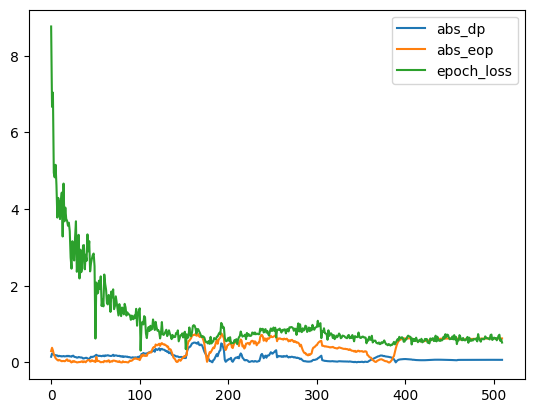

In [72]:
res['abs_dp'] = abs(res['dp'])
res['abs_eop'] = abs(res['eop'])
res['abs_aod'] = abs(res['average_odds_difference'])
res[['abs_dp', 'abs_eop', 'epoch_loss']].iloc[:, :].plot()

<AxesSubplot:>

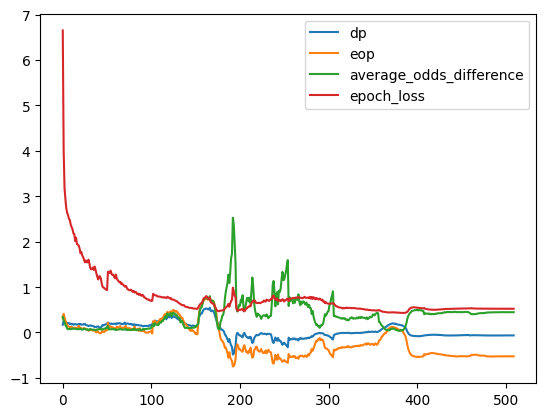

In [8]:
val_res = pd.DataFrame(val_info)
epoch_loss_list_val = val_list[::]
val_res['epoch_loss'] = epoch_loss_list_val
# val_res.to_csv('val_info.csv')

<AxesSubplot:>

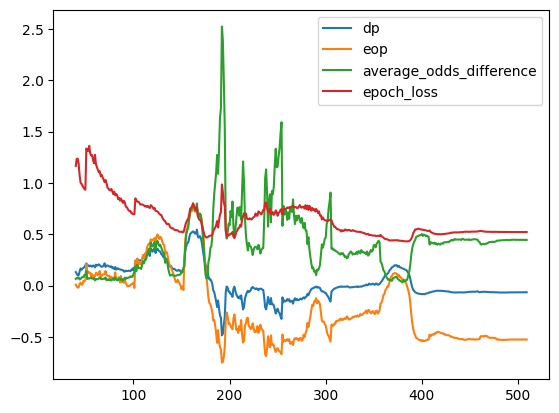

In [39]:
val_res[['dp', 'eop', 'average_odds_difference', 'epoch_loss']].iloc[40:, :].plot()

In [9]:
val_res.describe()

,overall_acc,dp,eop,average_odds_difference,grp_0_acc,grp_1_acc,epoch_loss
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.790728,0.043340,-0.190372,0.383101,0.889768,0.743983,0.756673
std,0.039763,0.166814,0.344989,0.320623,0.049945,0.045732,0.497900
min,0.583231,-0.485795,-0.749562,0.030370,0.458812,0.641953,0.430006
25%,0.766316,-0.065977,-0.508257,0.104064,0.894157,0.702306,0.521778
50%,0.792230,-0.013443,-0.300710,0.372959,0.907088,0.741524,0.599918
75%,0.829853,0.172185,0.079588,0.450585,0.911877,0.792948,0.765636
max,0.844134,0.544839,0.752942,2.524951,0.919540,0.810127,6.648506


In [37]:
val_res[(abs(val_res['dp'])< 0.1) & (abs(val_res['eop']) < 0.1) & (abs(val_res['average_odds_difference']) < 0.1)]

,overall_acc,dp,eop,average_odds_difference,grp_0_acc,grp_1_acc,epoch_loss
42,0.8211,0.099387,-0.019412,0.070114,0.908525,0.779837,1.236583


In [10]:
new_df = pd.concat([res[['dp', 'eop', 'average_odds_difference', 'epoch_loss']], val_res[['dp', 'eop', 'average_odds_difference', 'epoch_loss']]], axis=1)

In [11]:
new_df.columns = ['dp', 'eop', 'aod', 'epoch_loss', 'vdp', 'veop', 'vaod', 'vepoch_loss']

<AxesSubplot:>

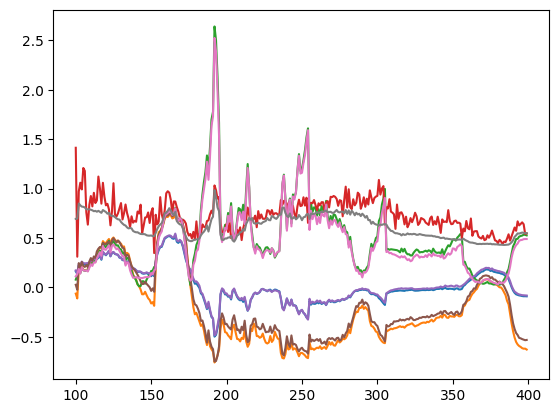

In [12]:
new_df.iloc[100:400,:].plot(legend=False)

In [21]:
from utils import EarlyStopping

In [13]:
import pandas as pd
res_no_debias = pd.DataFrame(train_info_no_debias)
epoch_loss_list = loss_list_no_debias[::]
res_no_debias['epoch_loss'] = epoch_loss_list
res_no_debias.to_csv('train_info_no_debias.csv')

In [14]:
res_no_debias.describe()

,overall_acc,dp,eop,average_odds_difference,grp_0_acc,grp_1_acc,epoch_loss
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.892458,0.171787,-0.008434,0.028393,0.953840,0.862934,0.806908
std,0.019873,0.016752,0.039983,0.023408,0.013704,0.023067,1.096528
min,0.748743,0.093339,-0.078049,0.002397,0.806619,0.720905,0.195237
25%,0.883009,0.167353,-0.027072,0.021525,0.949527,0.851129,0.286974
50%,0.901109,0.176258,-0.017891,0.025068,0.959102,0.873216,0.336757
75%,0.906551,0.180853,-0.000845,0.028236,0.962264,0.879854,0.705450
max,0.911129,0.236918,0.393902,0.410845,0.965012,0.885667,11.095547


In [15]:
res_no_debias[(abs(res_no_debias['dp'])< 0.1) & (abs(res_no_debias['eop']) < 0.2) & (abs(res_no_debias['average_odds_difference']) < 0.2)]

,overall_acc,dp,eop,average_odds_difference,grp_0_acc,grp_1_acc,epoch_loss
40,0.840493,0.093339,-0.051243,0.046596,0.928251,0.798283,2.55971


<AxesSubplot:>

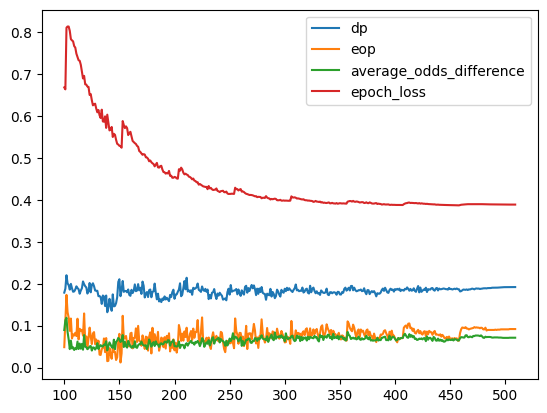

In [18]:
val_res_no_debias = pd.DataFrame(val_info_no_debias)
epoch_loss_list_val = val_list_no_debias[::]
val_res_no_debias['epoch_loss'] = epoch_loss_list_val
val_res.to_csv('val_info_no_debias.csv')
val_res_no_debias[['dp', 'eop', 'average_odds_difference', 'epoch_loss']].iloc[100:, :].plot()

In [19]:
val_res_no_debias.describe()

,overall_acc,dp,eop,average_odds_difference,grp_0_acc,grp_1_acc,epoch_loss
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.835197,0.180475,0.077992,0.067549,0.911845,0.799021,0.631714
std,0.007334,0.017008,0.033451,0.021166,0.005932,0.008469,0.517292
min,0.743090,0.101460,-0.021817,0.040543,0.809866,0.711573,0.387142
25%,0.833999,0.175881,0.064947,0.060132,0.911398,0.797242,0.391945
50%,0.837300,0.183707,0.077847,0.067222,0.912356,0.801537,0.418724
75%,0.838874,0.188649,0.090747,0.071981,0.913793,0.803797,0.627771
max,0.844287,0.259828,0.418073,0.369683,0.919061,0.809901,6.446000


In [23]:
es = EarlyStopping(patience=100)
for i, _ in enumerate(res['dp']):
    es(res['epoch_loss'][i])
    
    if  es.early_stop:
        print(i)
        break

EarlyStopping counter: 1 out of 100
EarlyStopping counter: 1 out of 100
EarlyStopping counter: 1 out of 100
EarlyStopping counter: 2 out of 100
EarlyStopping counter: 1 out of 100
EarlyStopping counter: 2 out of 100
EarlyStopping counter: 1 out of 100
EarlyStopping counter: 2 out of 100
EarlyStopping counter: 3 out of 100
EarlyStopping counter: 4 out of 100
EarlyStopping counter: 5 out of 100
EarlyStopping counter: 6 out of 100
EarlyStopping counter: 7 out of 100
EarlyStopping counter: 8 out of 100
EarlyStopping counter: 1 out of 100
EarlyStopping counter: 2 out of 100
EarlyStopping counter: 3 out of 100
EarlyStopping counter: 4 out of 100
EarlyStopping counter: 5 out of 100
EarlyStopping counter: 1 out of 100
EarlyStopping counter: 2 out of 100
EarlyStopping counter: 1 out of 100
EarlyStopping counter: 2 out of 100
EarlyStopping counter: 3 out of 100
EarlyStopping counter: 4 out of 100
EarlyStopping counter: 5 out of 100
EarlyStopping counter: 6 out of 100
EarlyStopping counter: 7 out

In [24]:
val_res_no_debias.iloc[201,:]

overall_acc                0.826474
dp                         0.174106
eop                        0.059351
average_odds_difference    0.050964
grp_0_acc                  0.910920
grp_1_acc                  0.786618
epoch_loss                 0.454220
Name: 201, dtype: float64

In [27]:
val_res.iloc[292,:]

overall_acc                0.753532
dp                        -0.014557
eop                       -0.149904
average_odds_difference    0.149265
grp_0_acc                  0.887931
grp_1_acc                  0.690099
epoch_loss                 0.706302
Name: 292, dtype: float64